# Results for predicates planning and ViLa planning

In [ ]:
import os
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

ROOT = os.path.dirname(os.path.dirname(os.path.abspath('.')))
print("ROOT", ROOT)

In [ ]:
sys.path.append(ROOT)

In [ ]:
FIGURES_FOLDER = os.path.join(ROOT, 'results', 'figures')
if not os.path.exists(FIGURES_FOLDER):
    os.makedirs(FIGURES_FOLDER)

In [ ]:
def save_fig(fig, name):
    if not name.lower().endswith('.pdf'):
        name = f"{name}.pdf"
    fig.savefig(
        os.path.join(FIGURES_FOLDER, name),
        format='pdf',
        bbox_inches='tight',
        dpi=300
    )
    plt.close(fig)

In [ ]:
experiment_folder = os.path.join(ROOT, 'results', 'planning', 'blocksworld', 'run_26_04_25')
assert os.path.exists(experiment_folder), f"Experiment folder {experiment_folder} does not exist"

predicates_folder = os.path.join(experiment_folder, 'predicates')
vila_folder = os.path.join(experiment_folder, 'vila')
assert os.path.exists(predicates_folder), f"Predicates folder {predicates_folder} does not exist"
assert os.path.exists(vila_folder), f"Vila folder {vila_folder} does not exist"

# List the content of the predicates folder
splits = os.listdir(predicates_folder)
assert len(splits) > 0, f"No splits found in {predicates_folder}"
assert splits == os.listdir(vila_folder), f"Predicates and Vila folders do not match: {predicates_folder} vs {vila_folder}"
splits.sort(reverse=True)
print("Splits:", splits)

Splits: ['simple', 'medium', 'hard']


In [ ]:
def load_results(folder):
    """
    Load the results from a folder.
    """
    results = defaultdict(dict)
    for split in splits:
        results[split] = defaultdict(dict)
        split_folder = os.path.join(folder, split)
        if not os.path.exists(split_folder):
            print(f"Split folder {split_folder} does not exist")
            continue
        models = os.listdir(split_folder)
        for model in models:
            model_folder = os.path.join(split_folder, model)
            print(f"Loading {model_folder}")
            contents = os.listdir(model_folder)
            if len(contents) == 0:
                print(f"Model folder {model_folder} is empty")
                continue
            if len(contents) > 1:
                print(f"Model folder {model_folder} has more than one file, defaulting to most recent")
            
            results_file = os.path.join(model_folder, sorted(contents)[-1])
            with open(results_file, 'r') as f:
                data = json.load(f)
            results[split][model] = data
    return results

In [ ]:
predicates_results = load_results(predicates_folder)
print()
vila_results = load_results(vila_folder)

Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_26_04_25/predicates/simple/InternVL3-8B
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_26_04_25/predicates/simple/gpt-4.1
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_26_04_25/predicates/simple/InternVL3-78B
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_26_04_25/predicates/simple/gemma-3-12b-it
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_26_04_25/predicates/simple/gemma-3-27b-it
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_26_04_25/predicates/simple/llava-onevision-qwen2-7b-ov-hf
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_26_04_25/predicates/s

## Predicates

In [ ]:
expected_models = set([
    "llava-onevision-qwen2-7b-ov-hf",
    "Qwen2.5-VL-7B-Instruct",
    "aya-vision-8b",
    "gemma-3-12b-it",
    "deepseek-vl2",
    "Phi-4-multimodal-instruct",
    "Molmo-7B-D-0924",
    "Mistral-Small-3.1-24B-Instruct-2503",
    "InternVL3-8B",
    "llava-onevision-qwen2-72b-ov-hf",
    "Qwen2.5-VL-72B-Instruct",
    "aya-vision-32b",
    "gemma-3-27b-it",
    "InternVL3-78B",
    "gpt-4.1",
    "gpt-4.1-nano",
])

In [ ]:
# color_map = {
#     "llava-onevision-qwen2-7b-ov-hf": "#E377EB",
#     "llava-onevision-qwen2-72b-ov-hf": "#E584ED",
#     "Qwen2.5-VL-7B-Instruct": "#3458B0",
#     "Qwen2.5-VL-72B-Instruct": "#80A8E0",
#     "aya-vision-8b": "#3AA655",
#     "aya-vision-32b": "#A8E080",
#     "gemma-3-12b-it": "#9467BD",
#     "gemma-3-27b-it": "#BD9467",
#     "deepseek-vl2": "#8C564B",
#     "Phi-4-multimodal-instruct": "#0A3235",
#     "Molmo-7B-D-0924": "#F0529C",
#     "Mistral-Small-3.1-24B-Instruct-2503": "#FF6A00",
#     "InternVL3-8B": "#D62728",
#     "InternVL3-78B": "#FF9896",
#     "gpt-4.1": "#10A37F",
#     "gpt-4.1-nano": "#74AA9C",
# }

color_map = {
    "llava-onevision-qwen2-7b-ov-hf": "#A569BD",
    "llava-onevision-qwen2-72b-ov-hf": "#6A0DAD",
    "Qwen2.5-VL-7B-Instruct": "#AEC7E8",
    "Qwen2.5-VL-72B-Instruct": "#1F77B4",
    "aya-vision-8b": "#98DF8A",
    "aya-vision-32b": "#2CA02C",
    "gemma-3-12b-it": "#e2f78b",
    "gemma-3-27b-it": "#ccff00",
    "deepseek-vl2": "#7F7F7F",
    "Phi-4-multimodal-instruct": "#FFD700",
    "Molmo-7B-D-0924": "#E377C2",
    "Mistral-Small-3.1-24B-Instruct-2503": "#FF7F0E",
    "InternVL3-8B": "#FF9896",
    "InternVL3-78B": "#D62728",
    "gpt-4.1": "#17A2B8",
    "gpt-4.1-nano": "#9ad9e3",
}


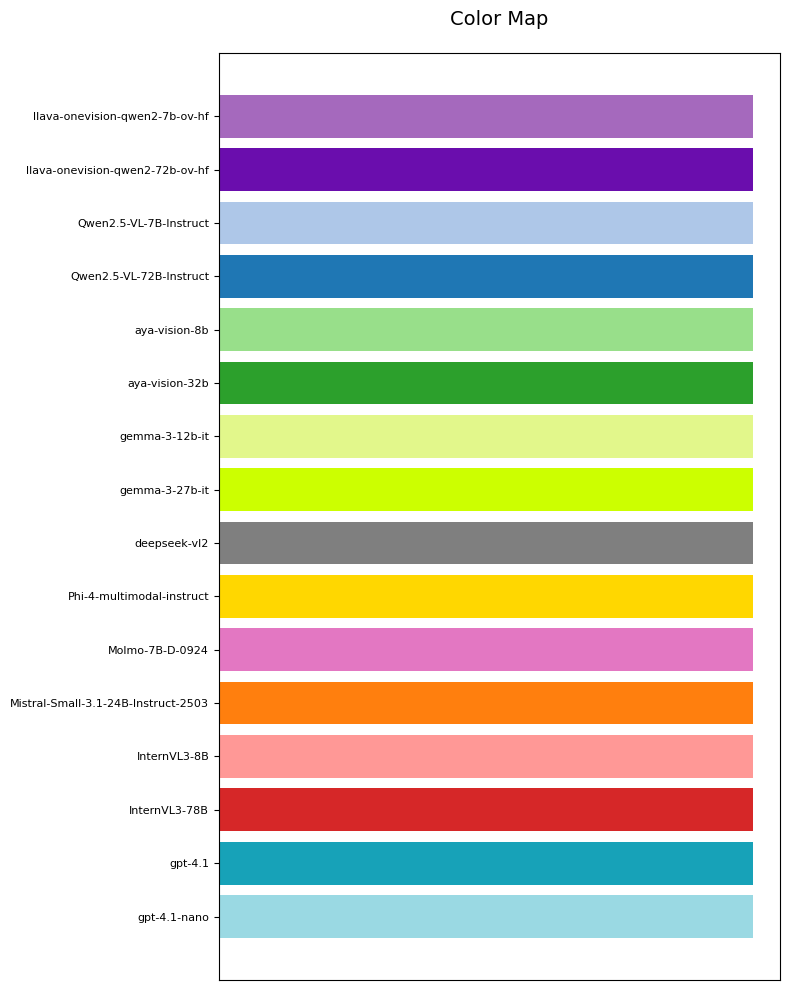

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))
model_names = list(color_map.keys())
colors = list(color_map.values())
y_positions = range(len(model_names))

ax.barh(y_positions, [1] * len(model_names), color=colors)
ax.set_yticks(y_positions)
ax.set_yticklabels(model_names, fontsize=8)
ax.invert_yaxis()
ax.set_xticks([])
ax.set_title('Color Map', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

In [ ]:
def list_models(results):
    """
    List the models in the results.
    """
    models = {split: set() for split in splits}
    for split in splits:
        for model in results[split]:
            models[split].add(model)
            
    # Compare the models across splits and print if some are missing
    for split in splits:
        for other_split in splits:
            if split == other_split:
                continue
            missing_models = models[split] - models[other_split]
            if len(missing_models) > 0:
                print(f"Missing models in {other_split} compared to {split}: {missing_models}")
                
    # Check if all expected models are present
    for split in splits:
        missing_models = expected_models - models[split]
        if len(missing_models) > 0:
            print(f"Missing models in {split}: {missing_models}")
        else:
            print(f"All expected models are present in {split}")
    
    return models

predicates_models = list_models(predicates_results)
predicates_models

All expected models are present in simple
All expected models are present in medium
All expected models are present in hard


{'simple': {'InternVL3-78B',
  'InternVL3-8B',
  'Mistral-Small-3.1-24B-Instruct-2503',
  'Molmo-7B-D-0924',
  'Phi-4-multimodal-instruct',
  'Qwen2.5-VL-72B-Instruct',
  'Qwen2.5-VL-7B-Instruct',
  'aya-vision-32b',
  'aya-vision-8b',
  'deepseek-vl2',
  'gemma-3-12b-it',
  'gemma-3-27b-it',
  'gpt-4.1',
  'gpt-4.1-nano',
  'llava-onevision-qwen2-72b-ov-hf',
  'llava-onevision-qwen2-7b-ov-hf'},
 'medium': {'InternVL3-78B',
  'InternVL3-8B',
  'Mistral-Small-3.1-24B-Instruct-2503',
  'Molmo-7B-D-0924',
  'Phi-4-multimodal-instruct',
  'Qwen2.5-VL-72B-Instruct',
  'Qwen2.5-VL-7B-Instruct',
  'aya-vision-32b',
  'aya-vision-8b',
  'deepseek-vl2',
  'gemma-3-12b-it',
  'gemma-3-27b-it',
  'gpt-4.1',
  'gpt-4.1-nano',
  'llava-onevision-qwen2-72b-ov-hf',
  'llava-onevision-qwen2-7b-ov-hf'},
 'hard': {'InternVL3-78B',
  'InternVL3-8B',
  'Mistral-Small-3.1-24B-Instruct-2503',
  'Molmo-7B-D-0924',
  'Phi-4-multimodal-instruct',
  'Qwen2.5-VL-72B-Instruct',
  'Qwen2.5-VL-7B-Instruct',
  'aya-

In [ ]:
def construct_main_table(results):
    rows = []
    for split in splits:
        for model, data in results.get(split, {}).items():
            # Safely round metrics, leaving NaN as is
            ta = results.get(split, {})[model].get('task_accuracy', np.nan)
            aa = results.get(split, {})[model].get('action_accuracy', np.nan)
            pa = results.get(split, {})[model].get('predicate_accuracy', np.nan)
            mpa = results.get(split, {})[model].get('macro_predicate_accuracy', np.nan)
            fr = results.get(split, {})[model].get('fail_ratio', np.nan)
            rows.append({
                'model': model,
                'split': split,
                'predicate accuracy': np.nan if pd.isna(pa) else round(pa, 3),
                'macro predicate accuracy': np.nan if pd.isna(mpa) else round(mpa, 3),
                'action accuracy': np.nan if pd.isna(aa) else round(aa, 2),
                'task accuracy': np.nan if pd.isna(ta) else round(ta, 2),
                'starting ratio': np.nan if pd.isna(1-fr) else round(1-fr, 2),
            })
    df = pd.DataFrame(rows)
    df['split'] = pd.Categorical(df['split'], categories=['simple', 'medium', 'hard'], ordered=True)
    df = df.sort_values(by=['model', 'split'])
    return df

predicates_main_table = construct_main_table(predicates_results)
predicates_main_table

model   split  predicate accuracy  \
2                         InternVL3-78B  simple               0.997   
18                        InternVL3-78B  medium               0.991   
34                        InternVL3-78B    hard               0.979   
0                          InternVL3-8B  simple               0.968   
16                         InternVL3-8B  medium               0.953   
32                         InternVL3-8B    hard               0.921   
14  Mistral-Small-3.1-24B-Instruct-2503  simple               0.989   
30  Mistral-Small-3.1-24B-Instruct-2503  medium               0.958   
46  Mistral-Small-3.1-24B-Instruct-2503    hard               0.957   
13                      Molmo-7B-D-0924  simple               0.940   
29                      Molmo-7B-D-0924  medium               0.931   
45                      Molmo-7B-D-0924    hard               0.912   
9             Phi-4-multimodal-instruct  simple               0.924   
25            Phi-4-multimodal-instruct  medium               0.894   
41            Phi-4-multimodal-instruct    hard               0.826   
6               Qwen2.5-VL-72B-Instruct  simple               0.983   
22              Qwen2.5-VL-72B-Instruct  medium               0.987   
38              Qwen2.5-VL-72B-Instruct    hard               0.970   
10               Qwen2.5-VL-7B-Instruct  simple               0.986   
26               Qwen2.5-VL-7B-Instruct  medium               0.974   
42               Qwen2.5-VL-7B-Instruct    hard               0.943   
8                        aya-vision-32b  simple               0.884   
24                       aya-vision-32b  medium               0.825   
40                       aya-vision-32b    hard               0.759   
12                        aya-vision-8b  simple               0.680   
28                        aya-vision-8b  medium               0.694   
44                        aya-vision-8b    hard               0.760   
11                         deepseek-vl2  simple               0.913   
27                         deepseek-vl2  medium               0.878   
43                         deepseek-vl2    hard               0.881   
3                        gemma-3-12b-it  simple               0.958   
19                       gemma-3-12b-it  medium               0.950   
35                       gemma-3-12b-it    hard               0.913   
4                        gemma-3-27b-it  simple               0.962   
20                       gemma-3-27b-it  medium               0.935   
36                       gemma-3-27b-it    hard               0.926   
1                               gpt-4.1  simple               0.995   
17                              gpt-4.1  medium               0.986   
33                              gpt-4.1    hard               0.984   
7                          gpt-4.1-nano  simple               0.893   
23                         gpt-4.1-nano  medium               0.849   
39                         gpt-4.1-nano    hard               0.841   
15      llava-onevision-qwen2-72b-ov-hf  simple               0.952   
31      llava-onevision-qwen2-72b-ov-hf  medium               0.938   
47      llava-onevision-qwen2-72b-ov-hf    hard               0.933   
5        llava-onevision-qwen2-7b-ov-hf  simple               0.917   
21       llava-onevision-qwen2-7b-ov-hf  medium               0.882   
37       llava-onevision-qwen2-7b-ov-hf    hard               0.862   

    marco predicate accuracy  action accuracy  task accuracy  starting ratio  
2                      0.997             0.94           0.92            1.00  
18                     0.991             0.87           0.80            1.00  
34                     0.979             0.71           0.56            0.96  
0                      0.926             0.26           0.32            0.92  
16                     0.906             0.07           0.00            0.72  
32                     0.884             0.03           0.00            0.96  
1

In [ ]:
print(predicates_main_table.to_latex(index=False, float_format="%.2f", escape=False, column_format='lcccccc', multirow=True))

/tmp/ipykernel_149072/836794087.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/836794087.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_149072/836794087.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/836794087.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_149072/836794087.py:13: FutureWarning: 



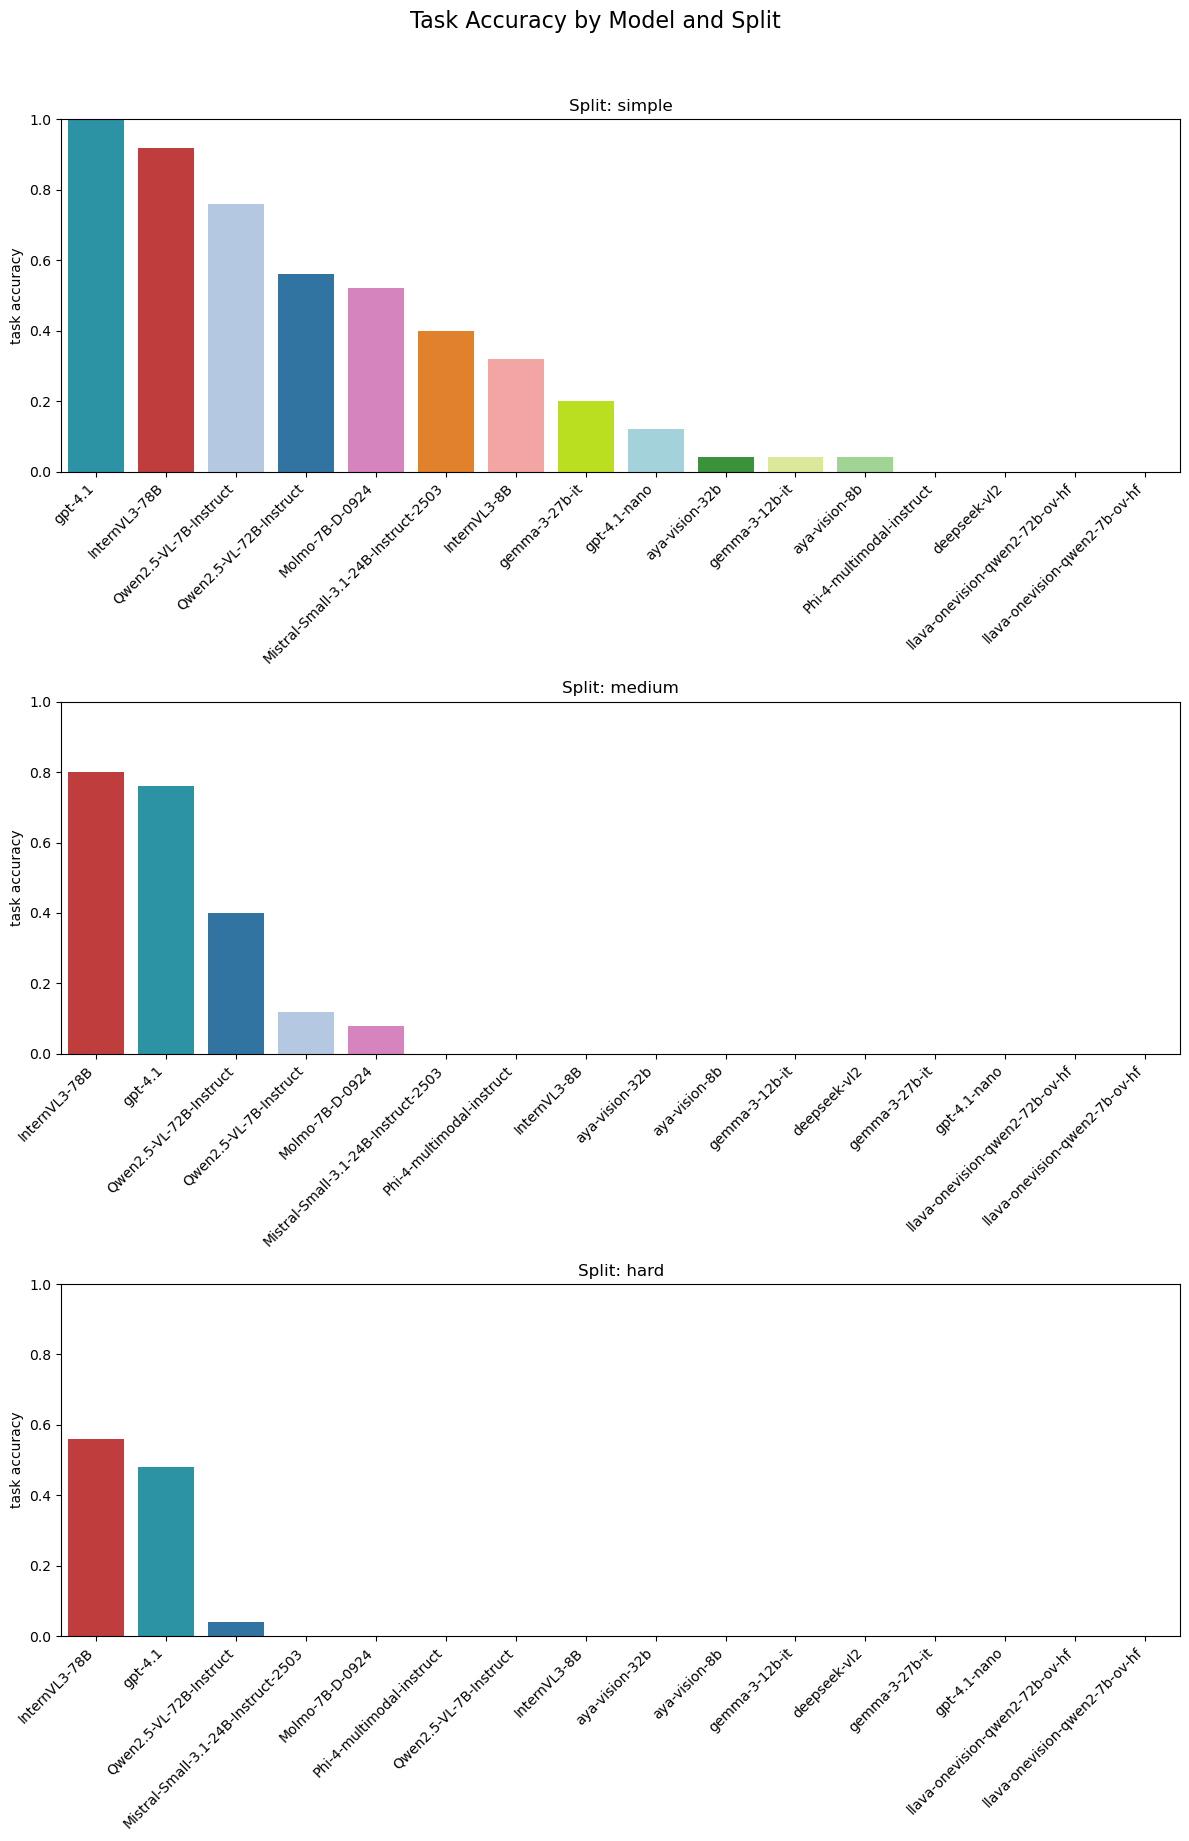

In [ ]:
def plot_task_accuracy_bar(main_table):
    """
    Plot a 3×1 grid of barplots for task accuracy by model,
    one subplot per split, sorted descending, using color_map.
    """
    fig, axes = plt.subplots(len(splits), 1, figsize=(12, 18), sharey=True)
    for ax, split in zip(axes, splits):
        df_split = main_table[main_table['split'] == split]
        if df_split.empty:
            ax.set_visible(False)
            continue
        df_sorted = df_split.sort_values('task accuracy', ascending=False)
        sns.barplot(
            data=df_sorted,
            x='model', y='task accuracy',
            palette=color_map,
            ax=ax
        )
        ax.set_title(f"Split: {split}")
        ax.set_ylim(0, 1)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_xlabel('')
    fig.suptitle("Task Accuracy by Model and Split", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_task_accuracy_bar(predicates_main_table)


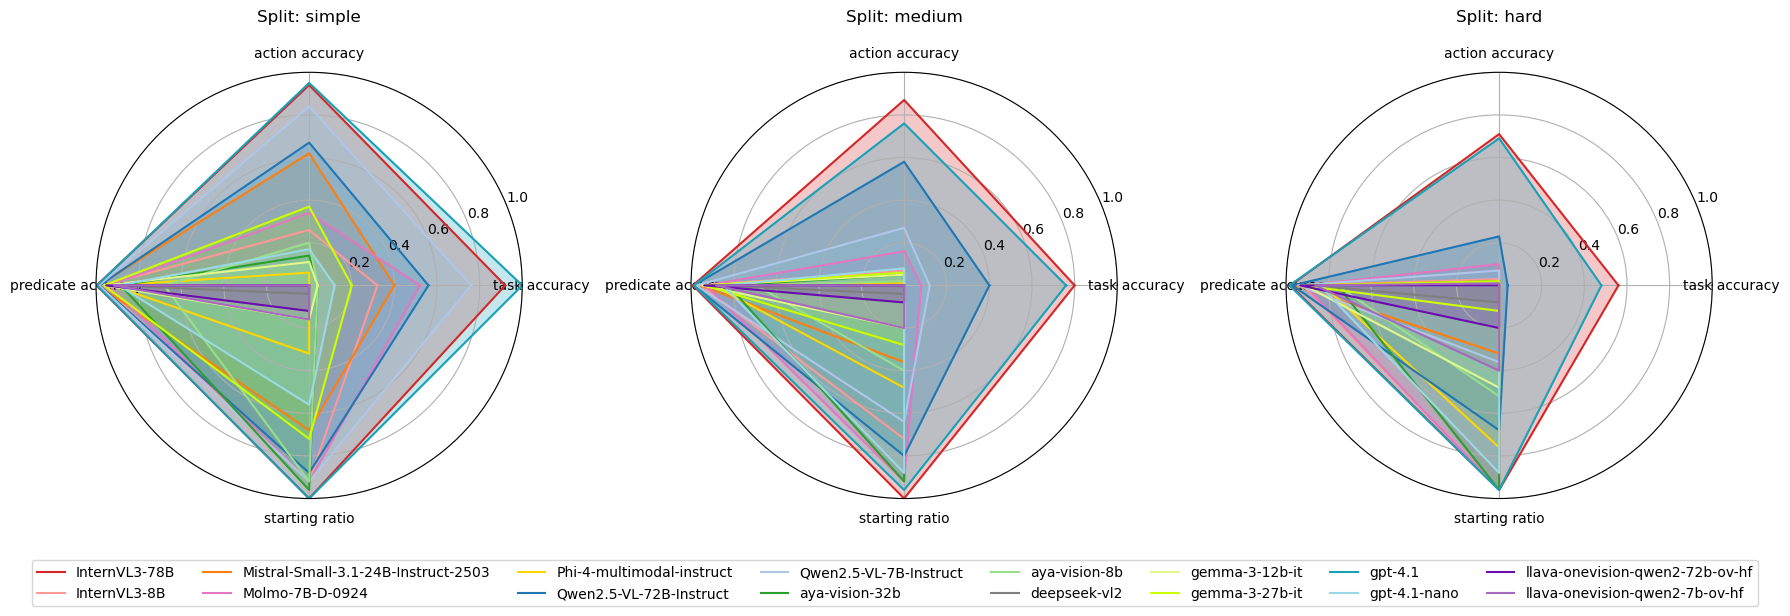

In [ ]:
def plot_radar_main_table(main_table, metrics=['task accuracy', 'action accuracy', 'predicate accuracy', 'starting ratio']):
    fig, axes = plt.subplots(1, len(splits), figsize=(18, 6),
                             subplot_kw={'polar': True})

    for ax, split in zip(axes, splits):
        df_split = main_table[main_table['split'] == split]
        if df_split.empty:
            ax.set_visible(False)
            continue

        angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
        angles += angles[:1]  # close the circle

        for _, row in df_split.iterrows():
            model = row['model']
            values = [row[m] for m in metrics]
            values += values[:1]
            c = color_map.get(model, 'gray')
            ax.plot(angles, values, label=model, color=c)
            ax.fill(angles, values, color=c, alpha=0.25)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(metrics)
        ax.set_ylim(0, 1)
        ax.set_title(f'Split: {split}', y=1.1)

    # get legend from first non-empty axis
    for ax in axes:
        handles, labels = ax.get_legend_handles_labels()
        if handles:
            break

    ncol = int(np.ceil(len(labels) / 2))
    fig.legend(handles, labels, loc='lower center', ncol=ncol,
               bbox_to_anchor=(0.5, -0.05))

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    return fig

fig = plot_radar_main_table(predicates_main_table)
# save_fig(fig, 'main_predicates_radar_no_cot')
fig.show()

In [ ]:
def construct_predicates_table(results):
    rows = []
    for split in splits:
        for model, data in results.get(split, {}).items():
            # Safely round metrics, leaving NaN as is
            for predicate, pred_data in data.get('predicate_stats', {}).items():
                rows.append({
                    'model': model,
                    'split': split,
                    'predicate': predicate,
                    'accuracy': np.nan if pd.isna(pred_data.get('accuracy')) else round(pred_data.get('accuracy'), 3),
                    'yes_accuracy': np.nan if pd.isna(pred_data.get('yes_accuracy')) else round(pred_data.get('yes_accuracy'), 3),
                    'no_accuracy': np.nan if pd.isna(pred_data.get('no_accuracy')) else round(pred_data.get('no_accuracy'), 3),
                    
                })
    df = pd.DataFrame(rows)
    df['split'] = pd.Categorical(df['split'], categories=['simple', 'medium', 'hard'], ordered=True)
    df = df.sort_values(by=['model', 'split'])
    return df

predicates_table = construct_predicates_table(predicates_results)
predicates_table

model   split predicate  accuracy  yes_accuracy  \
10                    InternVL3-78B  simple        on     0.996         1.000   
11                    InternVL3-78B  simple  incolumn     0.990         1.000   
12                    InternVL3-78B  simple     clear     1.000         1.000   
13                    InternVL3-78B  simple   rightof     0.998         1.000   
14                    InternVL3-78B  simple    leftof     1.000         1.000   
..                              ...     ...       ...       ...           ...   
185  llava-onevision-qwen2-7b-ov-hf    hard        on     0.792         0.896   
186  llava-onevision-qwen2-7b-ov-hf    hard  incolumn     0.939         0.951   
187  llava-onevision-qwen2-7b-ov-hf    hard     clear     0.520         0.722   
188  llava-onevision-qwen2-7b-ov-hf    hard   rightof     0.934         1.000   
189  llava-onevision-qwen2-7b-ov-hf    hard    leftof     0.961         1.000   

     no_accuracy  
10         0.995  
11         0.987  
12         1.000  
13         0.996  
14         1.000  
..           ...  
185        0.783  
186        0.935  
187        0.292  
188        0.894  
189        0.938  

[240 rows x 6 columns]

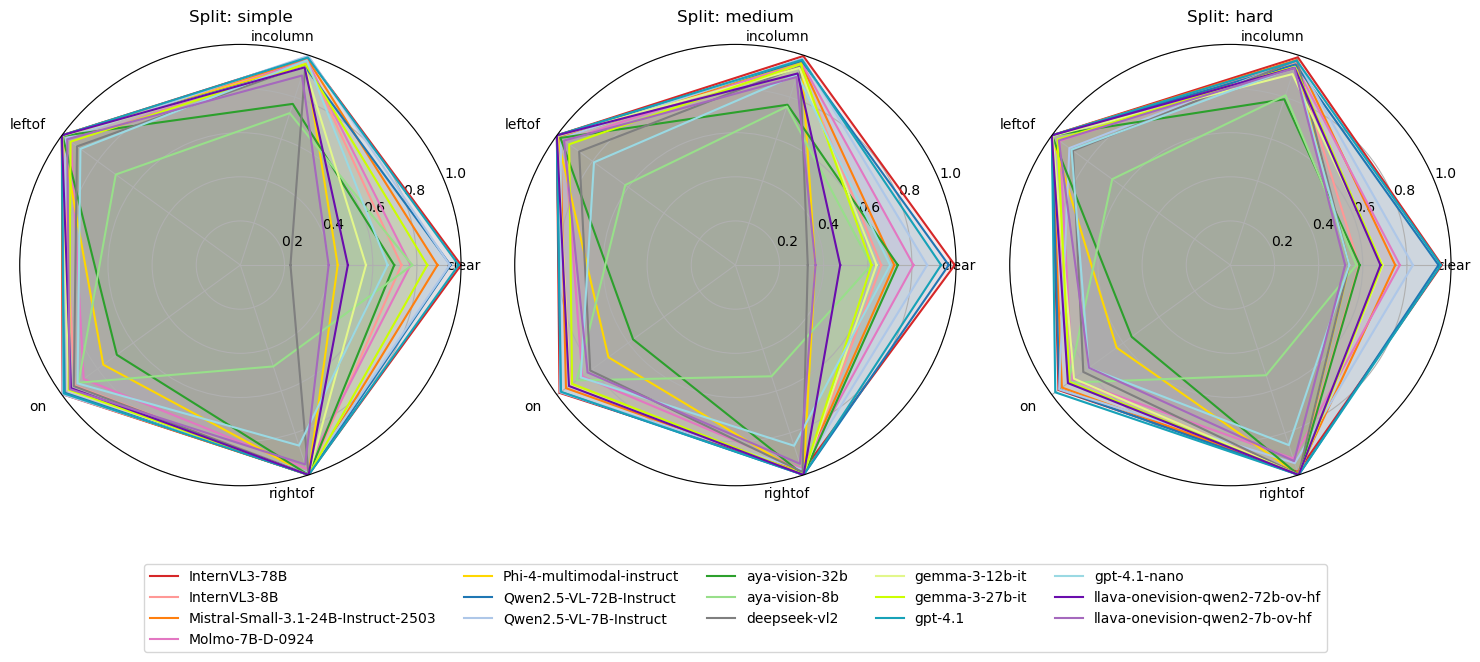

In [ ]:
def plot_predicate_accuracy_radar(predicates_table, splits):
    predicates = sorted(predicates_table['predicate'].unique())
    angles = np.linspace(0, 2 * np.pi, len(predicates), endpoint=False).tolist()
    angles += angles[:1]

    fig, axes = plt.subplots(1, len(splits), figsize=(5 * len(splits), 5),
                             subplot_kw={'polar': True})
    if len(splits) == 1:
        axes = [axes]

    for ax, split in zip(axes, splits):
        df_split = predicates_table[predicates_table['split'] == split]
        if df_split.empty:
            ax.set_visible(False)
            continue

        pivot = df_split.pivot(index='model', columns='predicate', values='accuracy')
        for model in pivot.index:
            vals = pivot.loc[model, predicates].fillna(0).tolist()
            vals += vals[:1]
            c = color_map.get(model, 'gray')
            ax.plot(angles, vals, label=model, color=c)
            ax.fill(angles, vals, color=c, alpha=0.1)

        ax.set_xticks(angles[:-1])
        ax.set_xticklabels(predicates, rotation=45, ha='right')
        ax.set_ylim(0, 1)
        ax.set_title(f"Split: {split}")

    # deduplicate legend entries
    handles, labels = axes[0].get_legend_handles_labels()
    unique = {}
    for h, l in zip(handles, labels):
        if l not in unique:
            unique[l] = h

    fig.legend(unique.values(), unique.keys(),
               loc='upper center', ncol=5, bbox_to_anchor=(0.5, -0.1))
    plt.tight_layout()
    plt.show()

plot_predicate_accuracy_radar(predicates_table, splits)

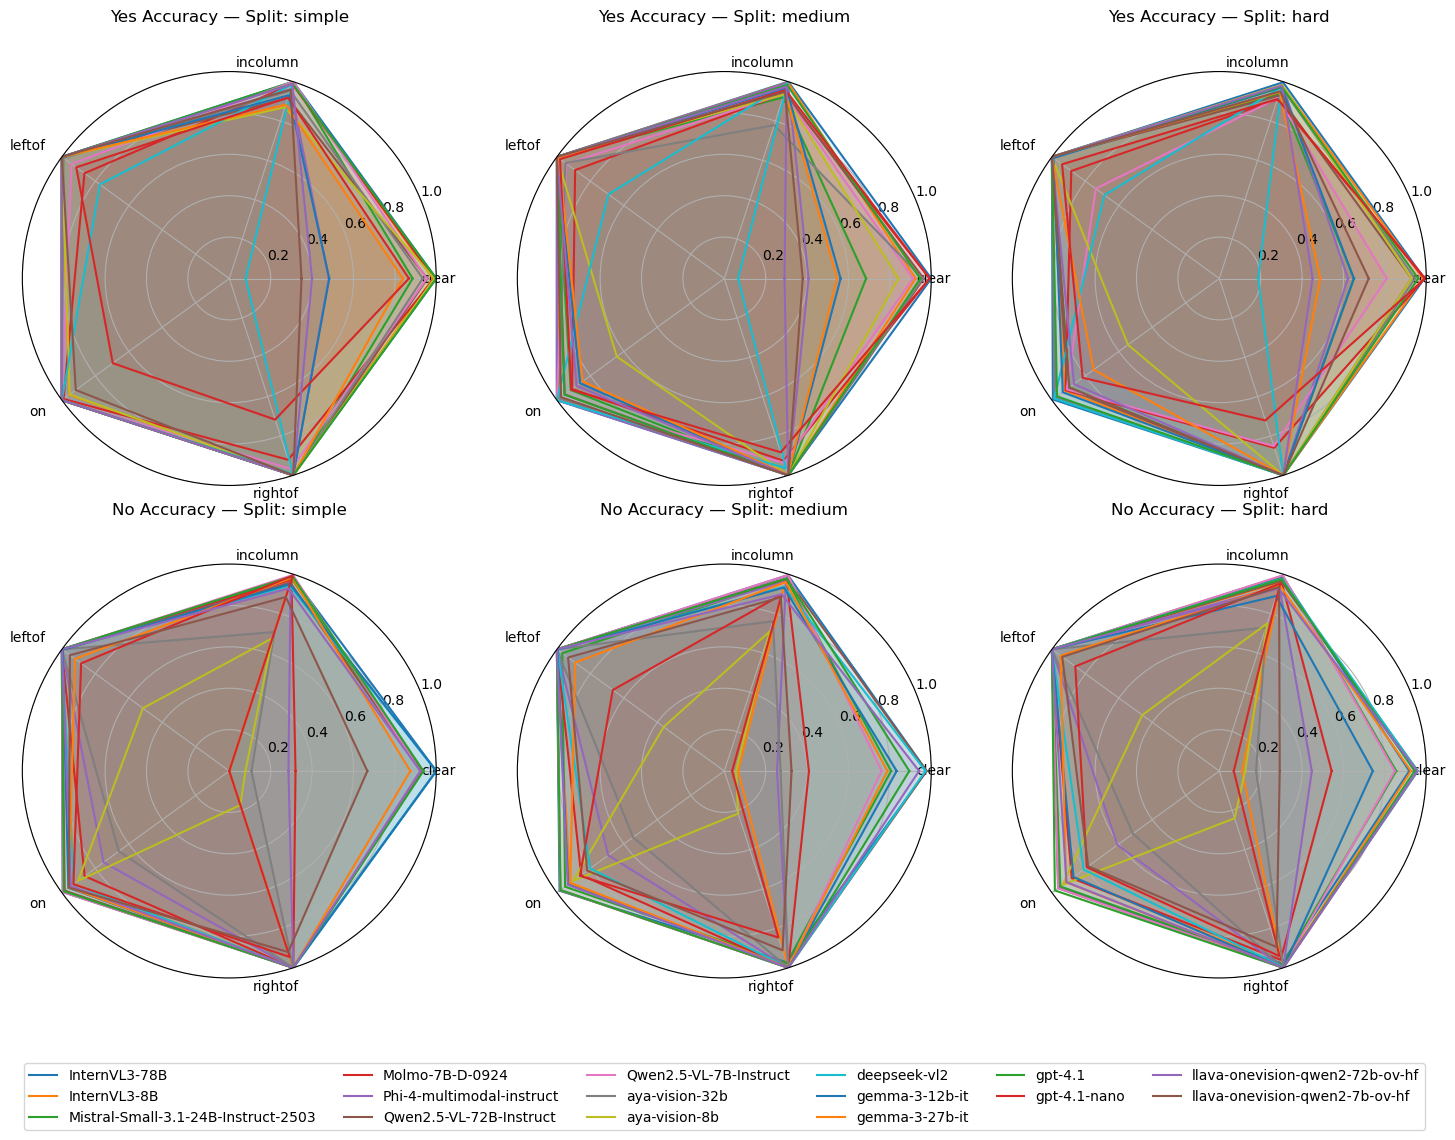

In [ ]:
def plot_predicate_yes_no_accuracy_radar(predicates_table, splits):
    """
    Plot a 2×3 grid of radar charts for yes_accuracy and no_accuracy
    for each split.
    """
    predicates = sorted(predicates_table['predicate'].unique())
    angles = np.linspace(0, 2 * np.pi, len(predicates), endpoint=False).tolist()
    angles += angles[:1]

    metrics = ['yes_accuracy', 'no_accuracy']
    titles = ['Yes Accuracy', 'No Accuracy']

    fig, axes = plt.subplots(
        2, len(splits),
        figsize=(5 * len(splits), 10),
        subplot_kw={'polar': True}
    )
    # Ensure axes is 2×n
    axes = axes.reshape(2, len(splits))

    for i, metric in enumerate(metrics):
        for j, split in enumerate(splits):
            ax = axes[i, j]
            df_split = predicates_table[predicates_table['split'] == split]
            if df_split.empty:
                ax.set_visible(False)
                continue

            pivot = df_split.pivot(
                index='model',
                columns='predicate',
                values=metric
            )
            for model in pivot.index:
                vals = pivot.loc[model, predicates].fillna(0).tolist()
                vals += vals[:1]
                ax.plot(angles, vals, label=model)
                ax.fill(angles, vals, alpha=0.1)

            ax.set_xticks(angles[:-1])
            ax.set_xticklabels(predicates, rotation=45, ha='right')
            ax.set_ylim(0, 1)
            ax.set_title(f"{titles[i]} — Split: {split}", y=1.1)

    # build a single legend
    for ax in axes.flatten():
        handles, labels = ax.get_legend_handles_labels()
        if labels:
            break
    unique = dict(zip(labels, handles))
    fig.legend(
        unique.values(), unique.keys(),
        loc='upper center',
        ncol=int(np.ceil(len(labels) / 3)),
        bbox_to_anchor=(0.5, -0.05)
    )

    plt.tight_layout()
    plt.show()

plot_predicate_yes_no_accuracy_radar(predicates_table, splits)

## Predicates w/CoT

In [ ]:
experiment_folder_cot = os.path.join(ROOT, 'results', 'planning', 'blocksworld', 'run_27_04_25_cot')
assert os.path.exists(experiment_folder), f"Experiment folder {experiment_folder} does not exist"

predicates_folder_cot = os.path.join(experiment_folder_cot, 'predicates')
predicates_results_cot = load_results(predicates_folder_cot)

Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/predicates/simple/InternVL3-78B
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/predicates/simple/gemma-3-12b-it
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/predicates/simple/gemma-3-27b-it
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/predicates/simple/llava-onevision-qwen2-7b-ov-hf
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/predicates/simple/Qwen2.5-VL-72B-Instruct
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/predicates/simple/aya-vision-32b
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/plan

In [ ]:
list_models(predicates_results_cot)

Missing models in medium compared to simple: {'Molmo-7B-D-0924'}
Missing models in hard compared to simple: {'aya-vision-8b', 'gemma-3-27b-it', 'Molmo-7B-D-0924'}
Missing models in hard compared to medium: {'aya-vision-8b', 'gemma-3-27b-it'}
Missing models in simple: {'Phi-4-multimodal-instruct', 'InternVL3-8B', 'gpt-4.1-nano', 'gpt-4.1'}
Missing models in medium: {'InternVL3-8B', 'gpt-4.1-nano', 'gpt-4.1', 'Phi-4-multimodal-instruct', 'Molmo-7B-D-0924'}
Missing models in hard: {'InternVL3-8B', 'gpt-4.1-nano', 'gpt-4.1', 'aya-vision-8b', 'Phi-4-multimodal-instruct', 'gemma-3-27b-it', 'Molmo-7B-D-0924'}


{'simple': {'InternVL3-78B',
  'Mistral-Small-3.1-24B-Instruct-2503',
  'Molmo-7B-D-0924',
  'Qwen2.5-VL-72B-Instruct',
  'Qwen2.5-VL-7B-Instruct',
  'aya-vision-32b',
  'aya-vision-8b',
  'deepseek-vl2',
  'gemma-3-12b-it',
  'gemma-3-27b-it',
  'llava-onevision-qwen2-72b-ov-hf',
  'llava-onevision-qwen2-7b-ov-hf'},
 'medium': {'InternVL3-78B',
  'Mistral-Small-3.1-24B-Instruct-2503',
  'Qwen2.5-VL-72B-Instruct',
  'Qwen2.5-VL-7B-Instruct',
  'aya-vision-32b',
  'aya-vision-8b',
  'deepseek-vl2',
  'gemma-3-12b-it',
  'gemma-3-27b-it',
  'llava-onevision-qwen2-72b-ov-hf',
  'llava-onevision-qwen2-7b-ov-hf'},
 'hard': {'InternVL3-78B',
  'Mistral-Small-3.1-24B-Instruct-2503',
  'Qwen2.5-VL-72B-Instruct',
  'Qwen2.5-VL-7B-Instruct',
  'aya-vision-32b',
  'deepseek-vl2',
  'gemma-3-12b-it',
  'llava-onevision-qwen2-72b-ov-hf',
  'llava-onevision-qwen2-7b-ov-hf'}}

In [ ]:
main_table_predicates_cot = construct_main_table(predicates_results_cot)
main_table_predicates_cot

model   split  predicate accuracy  \
0                         InternVL3-78B  simple               0.996   
12                        InternVL3-78B  medium               0.991   
23                        InternVL3-78B    hard               0.976   
10  Mistral-Small-3.1-24B-Instruct-2503  simple               0.980   
21  Mistral-Small-3.1-24B-Instruct-2503  medium               0.954   
30  Mistral-Small-3.1-24B-Instruct-2503    hard               0.938   
9                       Molmo-7B-D-0924  simple               0.929   
4               Qwen2.5-VL-72B-Instruct  simple               0.973   
16              Qwen2.5-VL-72B-Instruct  medium               0.986   
26              Qwen2.5-VL-72B-Instruct    hard               0.957   
6                Qwen2.5-VL-7B-Instruct  simple               0.976   
18               Qwen2.5-VL-7B-Instruct  medium               0.920   
28               Qwen2.5-VL-7B-Instruct    hard               0.893   
5                        aya-vision-32b  simple               0.889   
17                       aya-vision-32b  medium               0.851   
27                       aya-vision-32b    hard               0.795   
8                         aya-vision-8b  simple               0.512   
20                        aya-vision-8b  medium               0.498   
7                          deepseek-vl2  simple               0.905   
19                         deepseek-vl2  medium               0.855   
29                         deepseek-vl2    hard               0.857   
1                        gemma-3-12b-it  simple               0.929   
13                       gemma-3-12b-it  medium               0.905   
24                       gemma-3-12b-it    hard               0.880   
2                        gemma-3-27b-it  simple               0.963   
14                       gemma-3-27b-it  medium               0.936   
11      llava-onevision-qwen2-72b-ov-hf  simple               0.958   
22      llava-onevision-qwen2-72b-ov-hf  medium               0.944   
31      llava-onevision-qwen2-72b-ov-hf    hard               0.942   
3        llava-onevision-qwen2-7b-ov-hf  simple               0.934   
15       llava-onevision-qwen2-7b-ov-hf  medium               0.876   
25       llava-onevision-qwen2-7b-ov-hf    hard               0.889   

    marco predicate accuracy  action accuracy  task accuracy  starting ratio  
0                      0.993             0.95           0.96            1.00  
12                     0.992             0.87           0.80            0.96  
23                     0.984             0.72           0.56            0.96  
10                     0.973             0.64           0.56            0.84  
21                     0.945             0.19           0.04            0.52  
30                     0.943             0.06           0.00            0.48  
9                      0.838             0.00           0.00            0.00  
4                      0.962             0.58           0.48            0.84  
16                     0.981             0.41           0.20            0.80  
26                     0.960             0.16           0.00            0.60  
6                      0.942             0.14           0.08            0.52  
18                     0.887             0.09           0.00            0.40  
28                     0.899             0.05           0.00            0.64  
5                      0.844             0.10           0.00            0.88  
17                     0.825             0.08           0.04            1.00  
27                     0.795             0.02           0.00            0.96  
8                      0.560             0.00           0.00            0.00  
20                     0.461             0.00           0.00            0.00  
7                      0.864             0.17           0.04            0.72  
19                     0.820             0.06           0.00            0.48  
29                     0.841   

/tmp/ipykernel_149072/836794087.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/836794087.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_149072/836794087.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/836794087.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_149072/836794087.py:13: FutureWarning: 



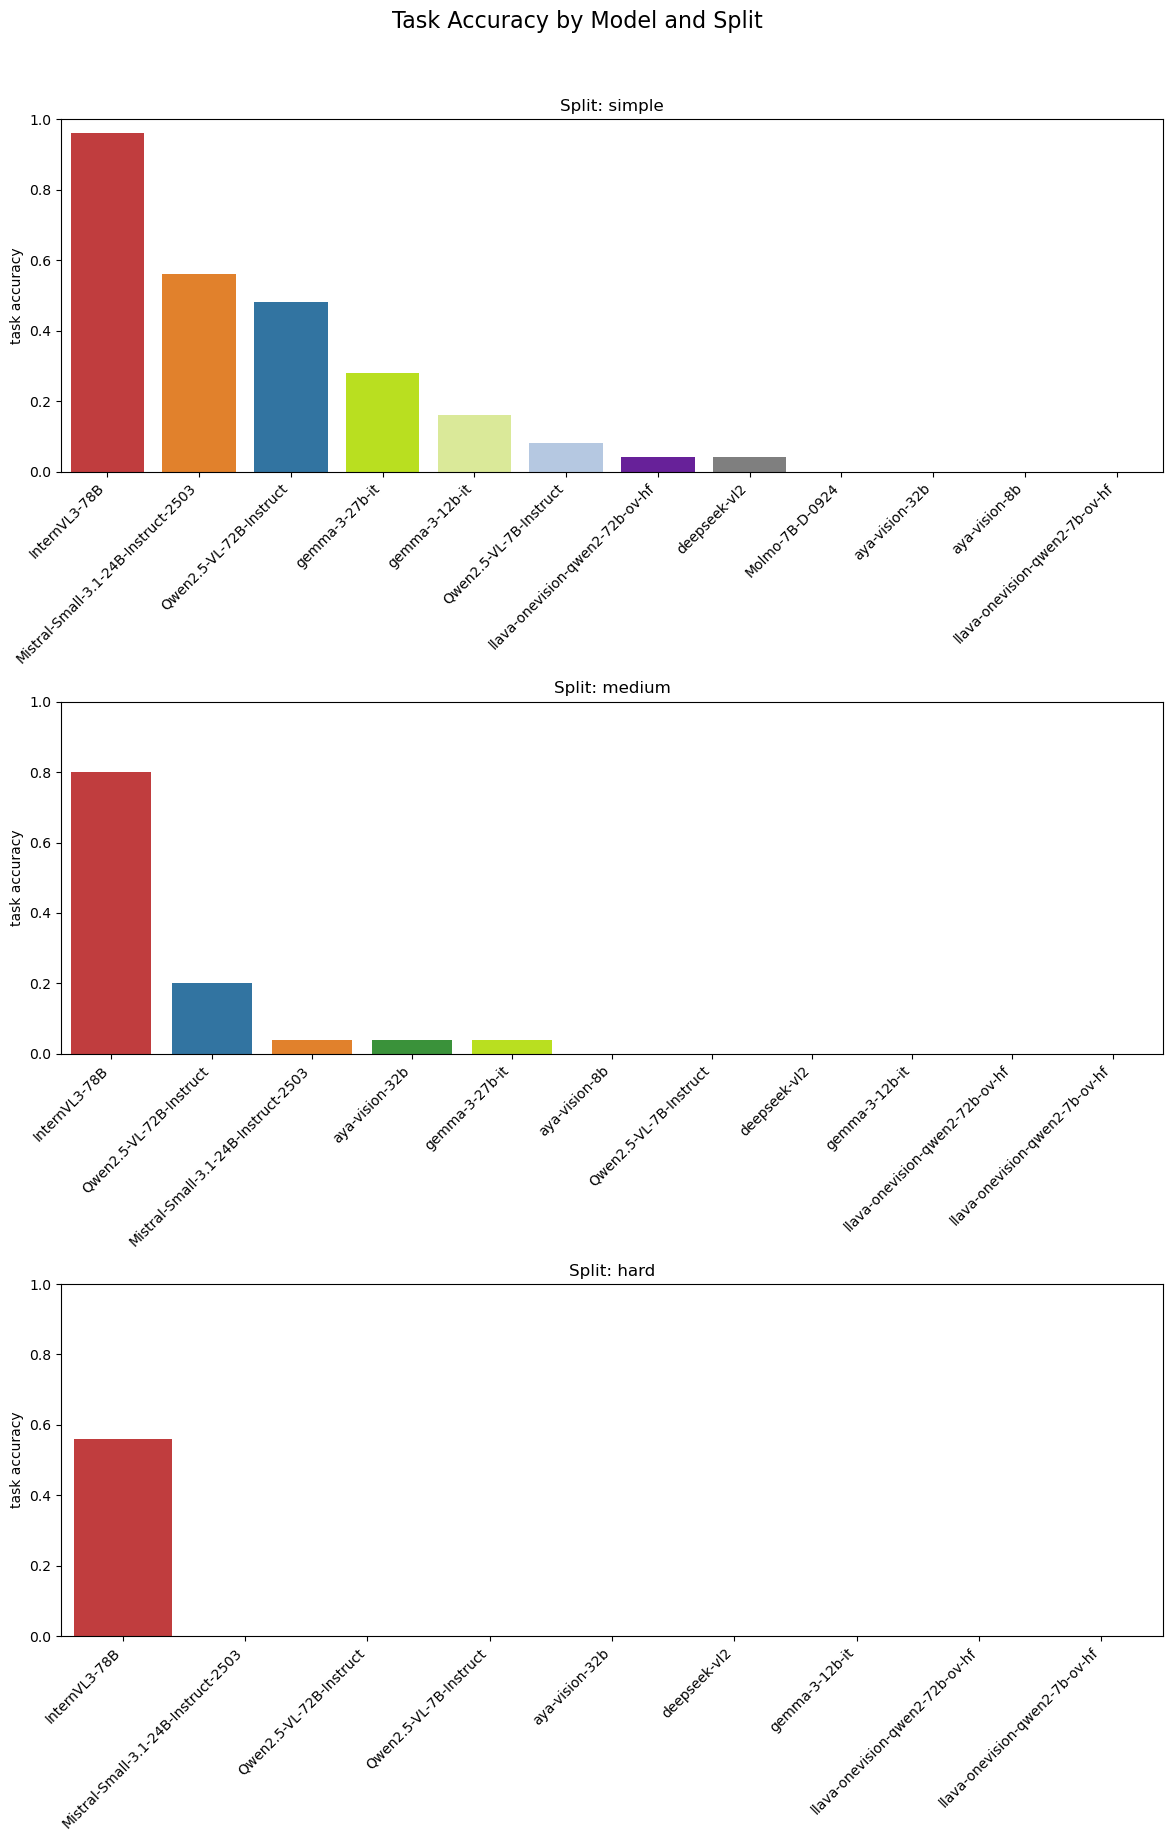

In [ ]:
plot_task_accuracy_bar(main_table_predicates_cot)

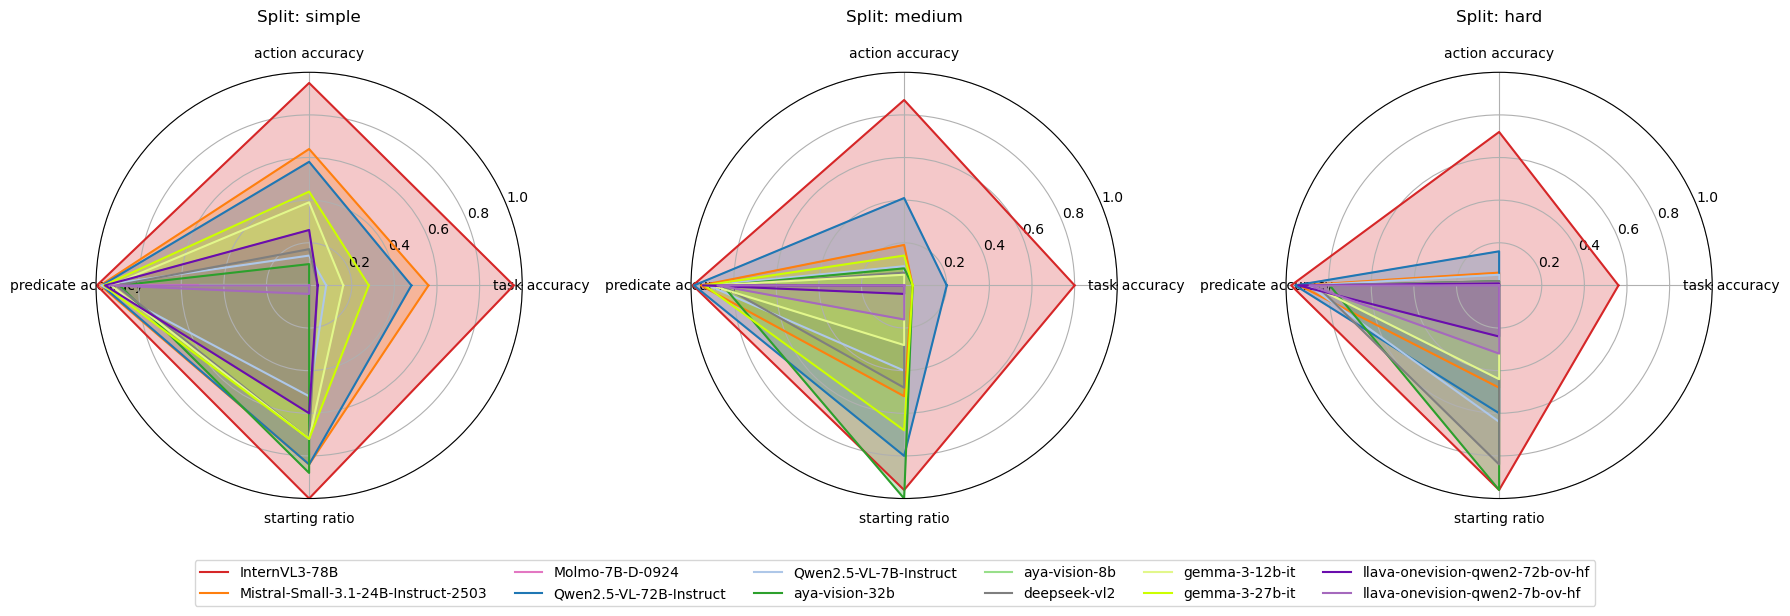

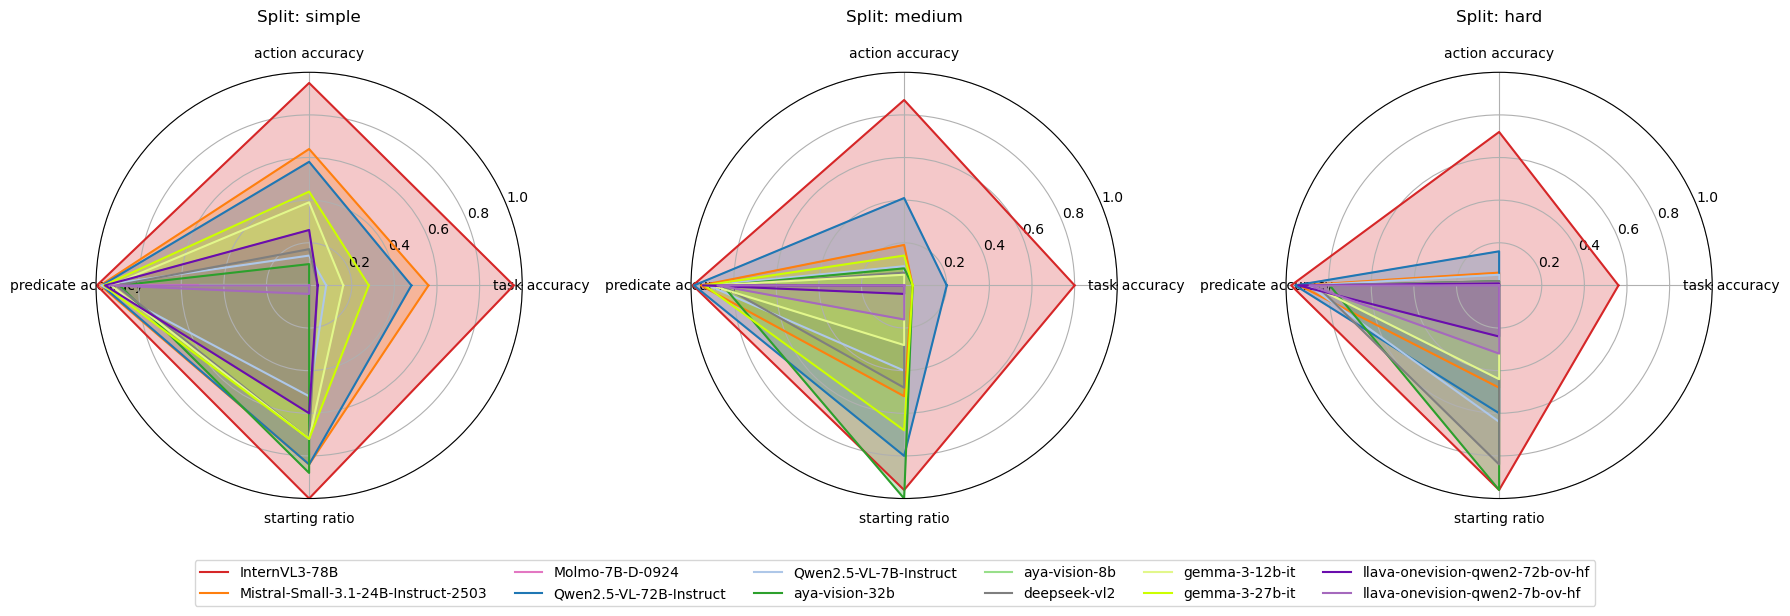

In [ ]:
plot_radar_main_table(main_table_predicates_cot)

/tmp/ipykernel_149072/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3171098816.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


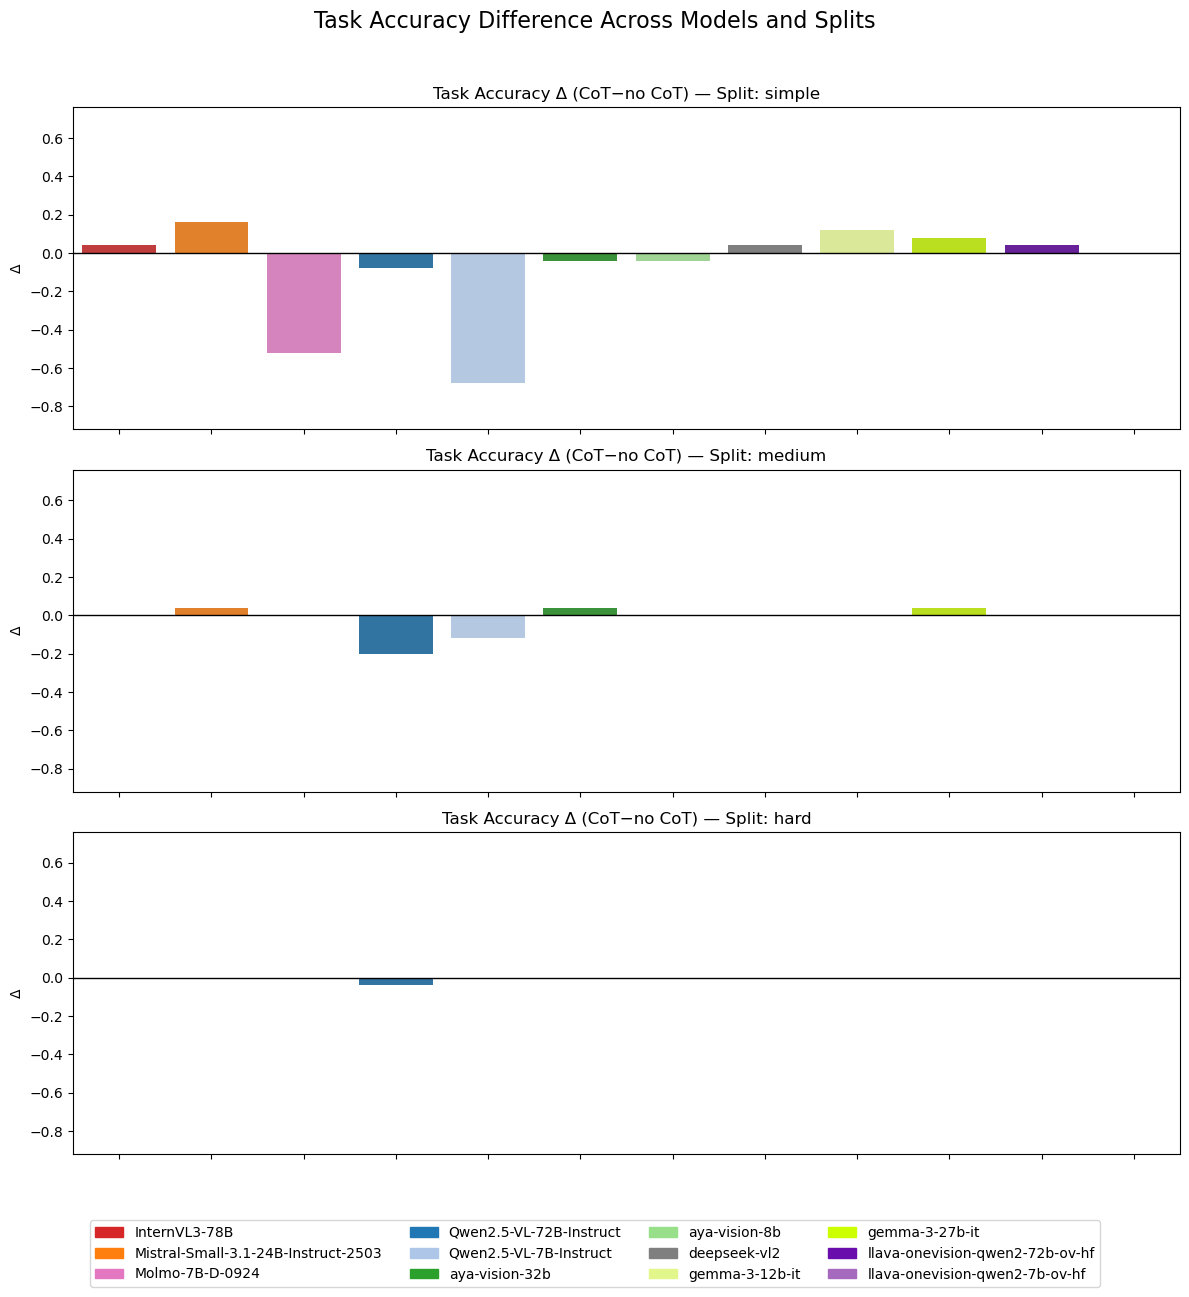

/tmp/ipykernel_149072/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3171098816.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


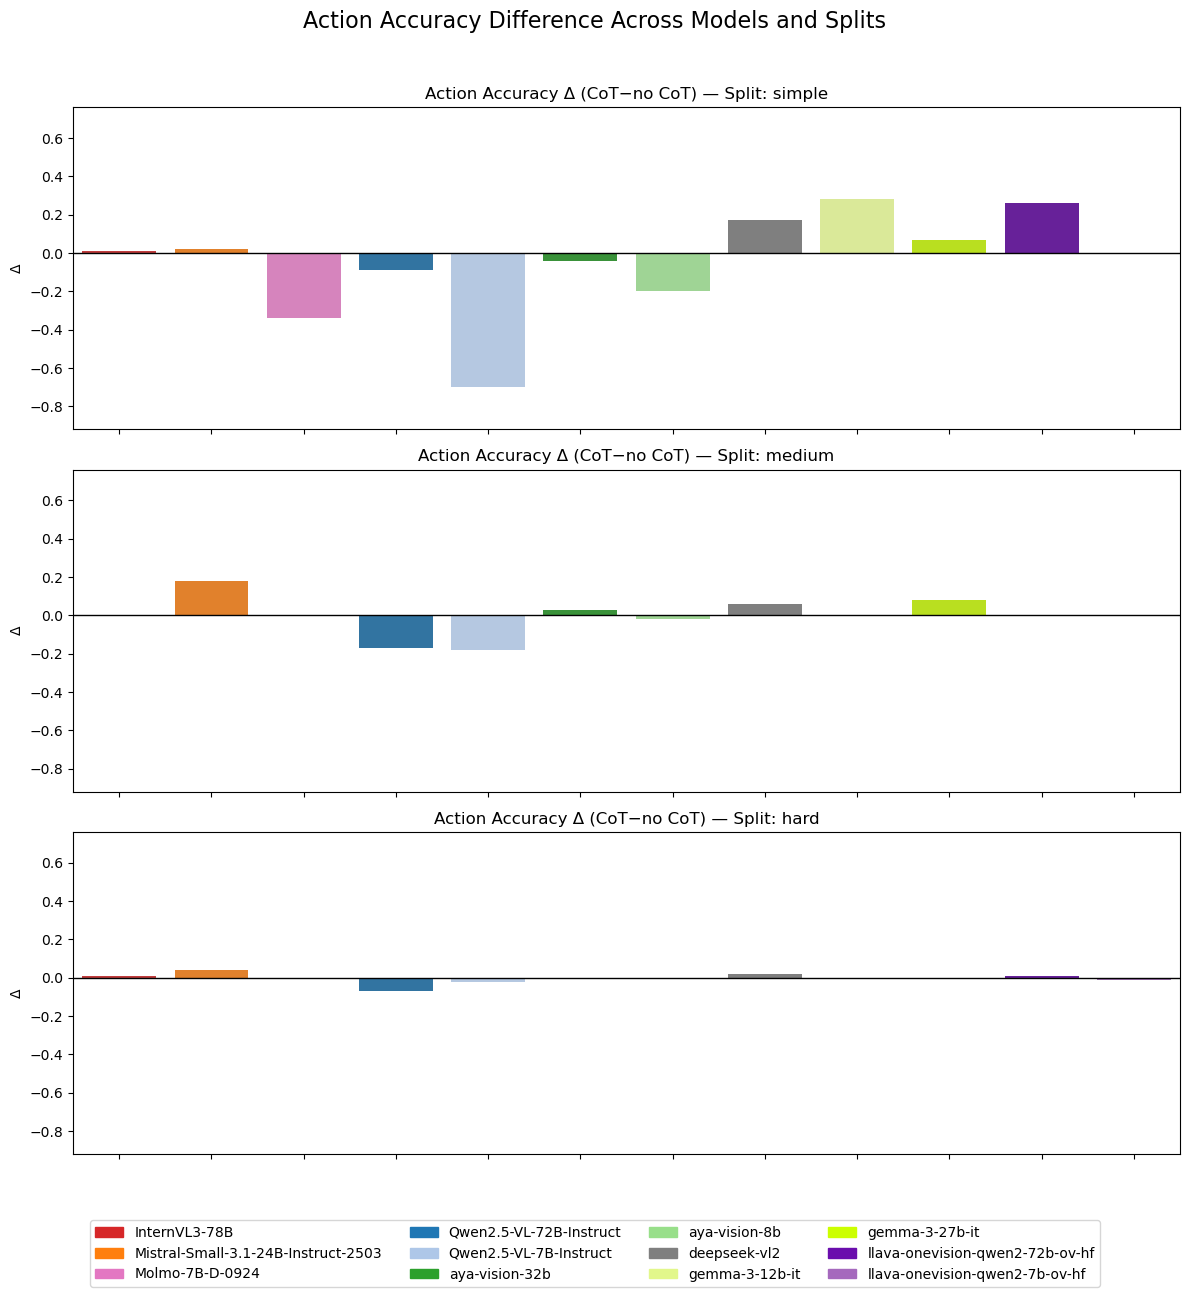

/tmp/ipykernel_149072/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3171098816.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


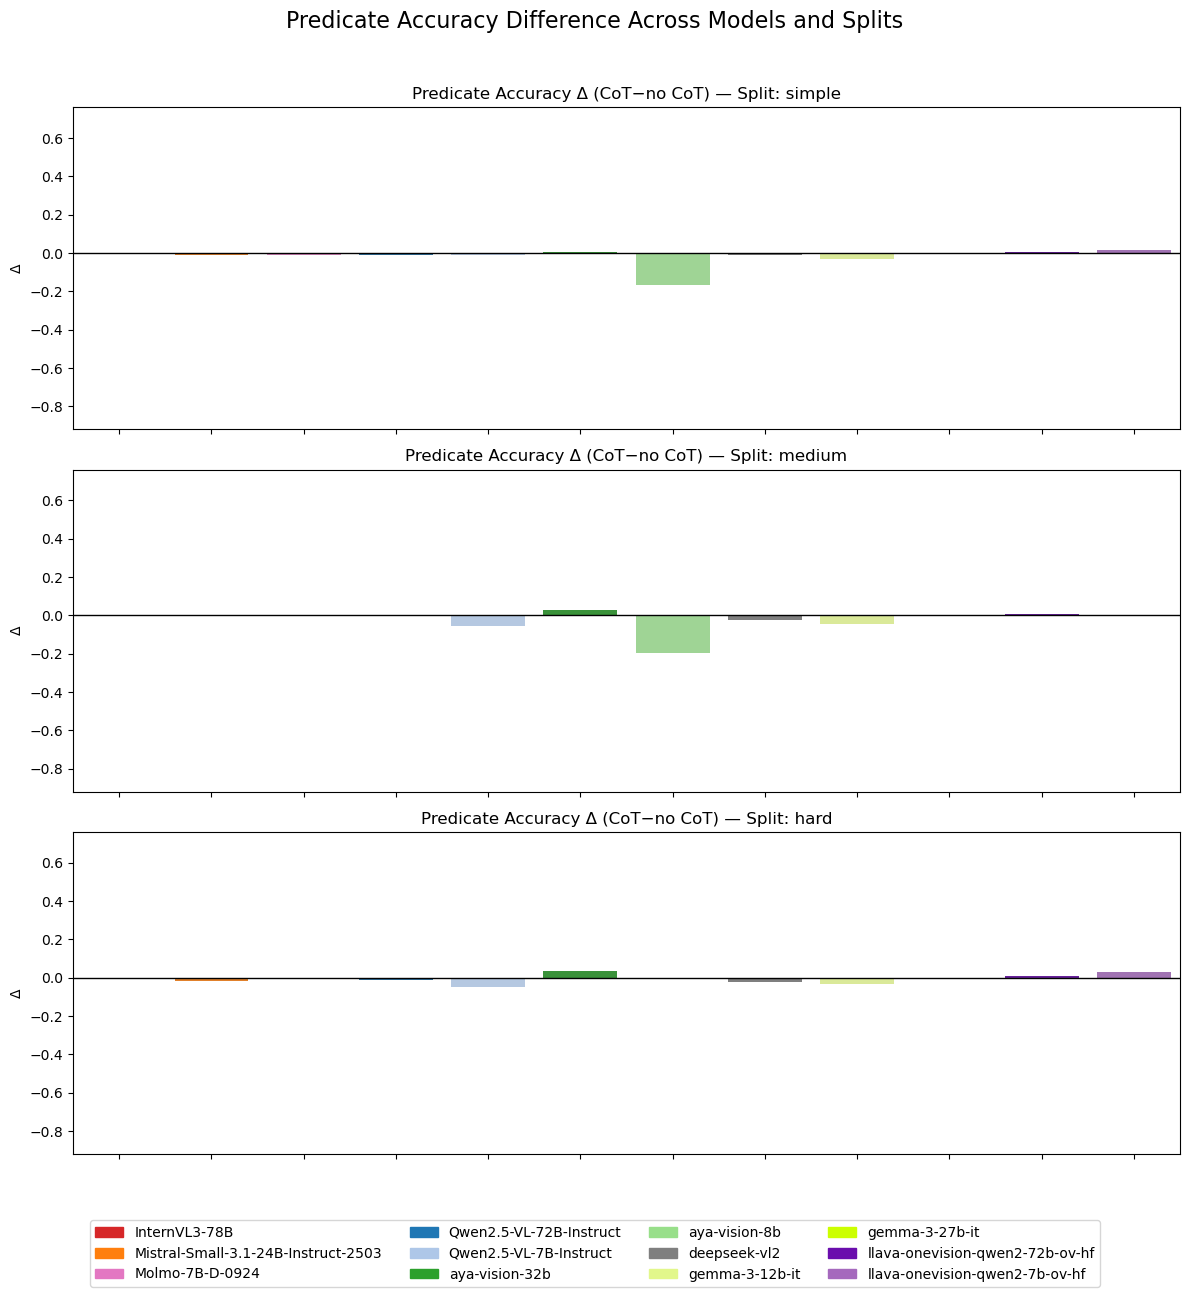

/tmp/ipykernel_149072/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3171098816.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3171098816.py:43: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


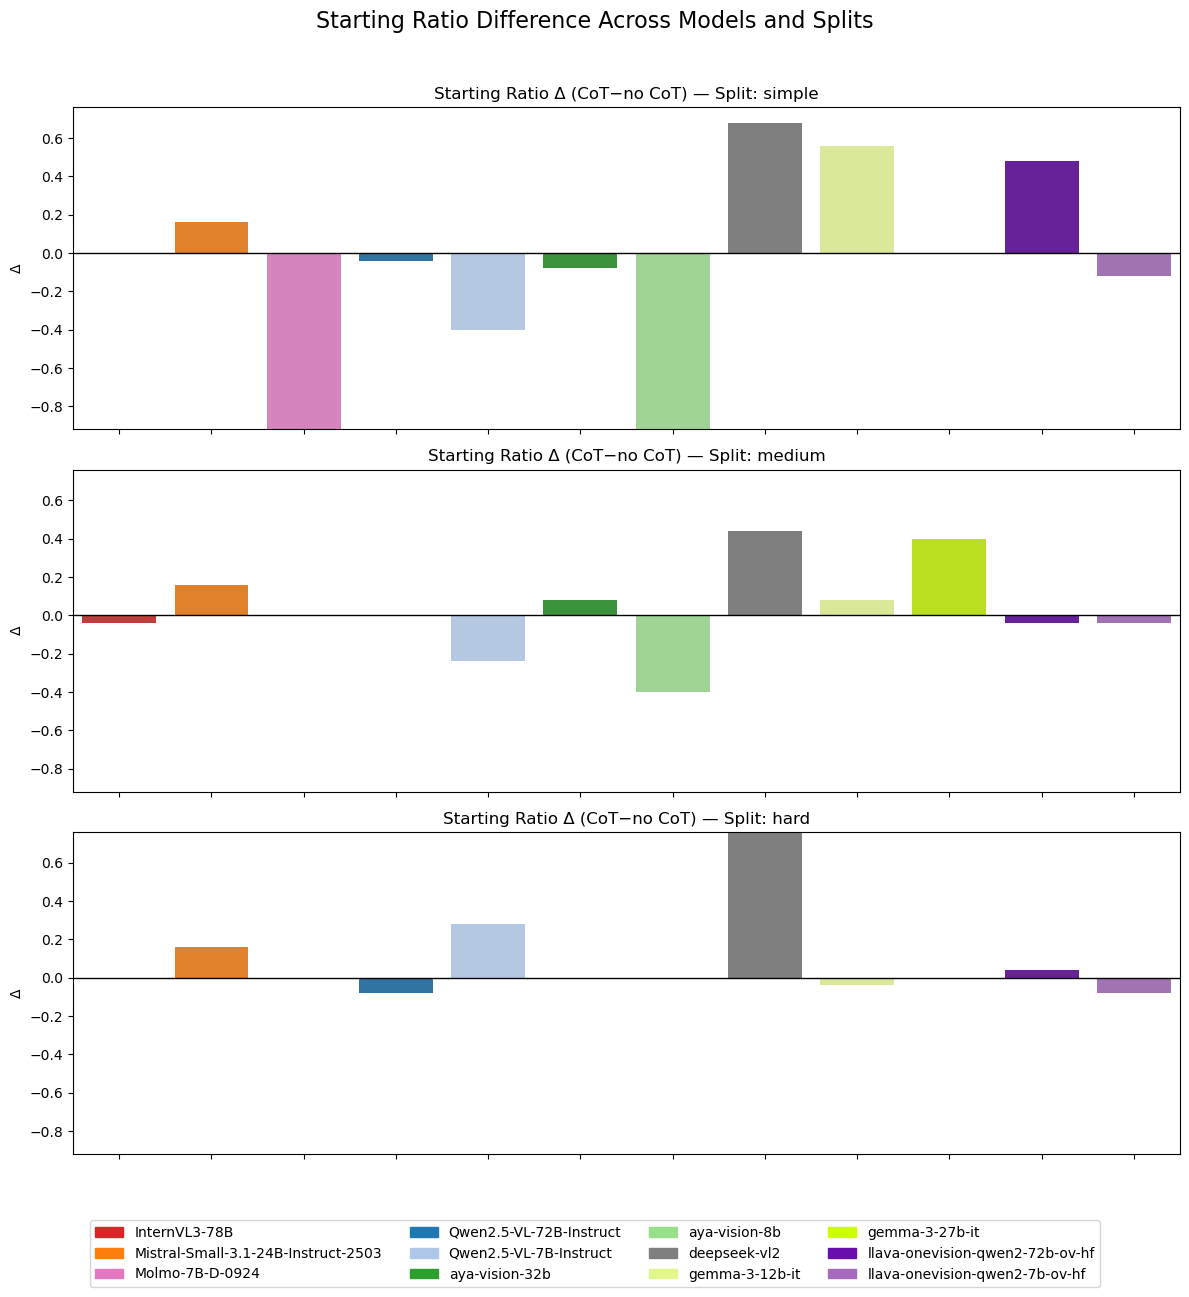

In [ ]:
from matplotlib.patches import Patch

# select the four metrics in both tables
cols = [
    'model','split',
    'task accuracy','action accuracy','predicate accuracy','starting ratio'
]

df_no  = predicates_main_table[cols]
df_cot = main_table_predicates_cot[cols]

# merge and compute diffs
df_diff = pd.merge(df_no, df_cot, on=['model','split'], suffixes=('_no','_cot'))
df_diff['task_diff']        = df_diff['task accuracy_cot']      - df_diff['task accuracy_no']
df_diff['action_diff']      = df_diff['action accuracy_cot']    - df_diff['action accuracy_no']
df_diff['predicate_diff']   = df_diff['predicate accuracy_cot'] - df_diff['predicate accuracy_no']
df_diff['start_ratio_diff'] = df_diff['starting ratio_cot']     - df_diff['starting ratio_no']

metrics = ['task_diff','action_diff','predicate_diff','start_ratio_diff']
titles  = ['Task Accuracy','Action Accuracy','Predicate Accuracy','Starting Ratio']

# global y‐axis limits
max_diff = df_diff[metrics].max().max()
min_diff = df_diff[metrics].min().min()

# models in this diff‐table
models = sorted(df_diff['model'].unique())

for metric, title in zip(metrics, titles):
    fig, axes = plt.subplots(len(splits), 1, figsize=(12, 4*len(splits)), sharex=True)
    for ax, split in zip(axes, splits):
        sub = df_diff[df_diff['split'] == split]
        sns.barplot(
            data=sub,
            x='model', y=metric,
            palette=color_map,
            ax=ax
        )
        ax.axhline(0, color='k', linewidth=1)
        ax.set_title(f"{title} Δ (CoT−no CoT) — Split: {split}")
        ax.set_ylabel("Δ")
        ax.set_xlabel("")
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_ylim(min_diff, max_diff)
    # legend from color_map
    handles = [Patch(color=color_map[m], label=m) for m in models]
    fig.legend(
        handles=handles,
        labels=models,
        loc='lower center',
        ncol=int(np.ceil(len(models)/3)),
        bbox_to_anchor=(0.5, -0.05)
    )
    fig.suptitle(f"{title} Difference Across Models and Splits", y=1.02, fontsize=16)
    plt.tight_layout(rect=[0,0.05,1,1])
    plt.show()


## ViLa

In [ ]:
vila_models = list_models(vila_results)

All expected models are present in simple
All expected models are present in medium
All expected models are present in hard


In [ ]:
def construct_vila_table(results):
    rows = []
    for split in splits:
        for model, data in results.get(split, {}).items():
            problem_keys = [k for k in data.keys() if isinstance(data[k], dict) and 'actions' in data[k]]
            avg_plan_length = np.mean([len(data[k]['actions']) for k in problem_keys])
            avg_success_plan_length = np.mean([len(data[k]['actions']) for k in problem_keys if data[k]['completed']])
            rows.append({
                'model': model,
                'split': split,
                'avg_plan_length': avg_plan_length,
                'avg_success_plan_length': avg_success_plan_length,
                **data['statistics']
            })
    df = pd.DataFrame(rows)
    df['split'] = pd.Categorical(df['split'], categories=['simple', 'medium', 'hard'], ordered=True)
    df = df.sort_values(by=['model', 'split'])
    return df

vila_main_table = construct_vila_table(vila_results)
vila_main_table

/scratch/work/bonettg1/.conda_envs/predicate_detection/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/work/bonettg1/.conda_envs/predicate_detection/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


model   split  avg_plan_length  \
2                         InternVL3-78B  simple             8.28   
18                        InternVL3-78B  medium            18.84   
34                        InternVL3-78B    hard            28.96   
0                          InternVL3-8B  simple             9.76   
16                         InternVL3-8B  medium            20.00   
32                         InternVL3-8B    hard            30.00   
14  Mistral-Small-3.1-24B-Instruct-2503  simple             9.00   
30  Mistral-Small-3.1-24B-Instruct-2503  medium            20.00   
46  Mistral-Small-3.1-24B-Instruct-2503    hard            30.00   
13                      Molmo-7B-D-0924  simple             0.00   
29                      Molmo-7B-D-0924  medium             0.00   
45                      Molmo-7B-D-0924    hard             0.00   
9             Phi-4-multimodal-instruct  simple             8.04   
25            Phi-4-multimodal-instruct  medium             6.28   
41            Phi-4-multimodal-instruct    hard             5.72   
6               Qwen2.5-VL-72B-Instruct  simple             9.20   
22              Qwen2.5-VL-72B-Instruct  medium            19.44   
38              Qwen2.5-VL-72B-Instruct    hard            30.00   
10               Qwen2.5-VL-7B-Instruct  simple             9.68   
26               Qwen2.5-VL-7B-Instruct  medium            18.08   
42               Qwen2.5-VL-7B-Instruct    hard            20.20   
8                        aya-vision-32b  simple             3.96   
24                       aya-vision-32b  medium             5.04   
40                       aya-vision-32b    hard             3.36   
12                        aya-vision-8b  simple             5.28   
28                        aya-vision-8b  medium             4.64   
44                        aya-vision-8b    hard             6.00   
11                         deepseek-vl2  simple            12.56   
27                         deepseek-vl2  medium            26.52   
43                         deepseek-vl2    hard            38.20   
3                        gemma-3-12b-it  simple             7.92   
19                       gemma-3-12b-it  medium            18.00   
35                       gemma-3-12b-it    hard            29.84   
4                        gemma-3-27b-it  simple             8.60   
20                       gemma-3-27b-it  medium            19.80   
36                       gemma-3-27b-it    hard            28.28   
1                               gpt-4.1  simple             7.20   
17                              gpt-4.1  medium            17.60   
33                              gpt-4.1    hard            24.88   
7                          gpt-4.1-nano  simple             8.92   
23                         gpt-4.1-nano  medium            17.52   
39                         gpt-4.1-nano    hard            24.60   
15      llava-onevision-qwen2-72b-ov-hf  simple             0.00   
31      llava-onevision-qwen2-72b-ov-hf  medium             0.00   
47      llava-onevision-qwen2-72b-ov-hf    hard             0.00   
5        llava-onevision-qwen2-7b-ov-hf  simple             0.00   
21       llava-onevision-qwen2-7b-ov-hf  medium             0.00   
37       llava-onevision-qwen2-7b-ov-hf    hard             0.00   

    avg_success_plan_length  total_actions  total_success  total_failed  \
2                  3.500000            207             74           133   
18                      NaN            471            103           368   
34                      NaN            724            119           605   
0                  4.000000            244             30           214   
16                      NaN            500             24           476   
32                      NaN            750             15           735   
14                 3.750000            225             99           126   
30                      NaN            500             87           413   
46                      Na

/tmp/ipykernel_149072/1223389129.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/1223389129.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_149072/1223389129.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/1223389129.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_149072/1223389129.py:9: FutureWarning: 

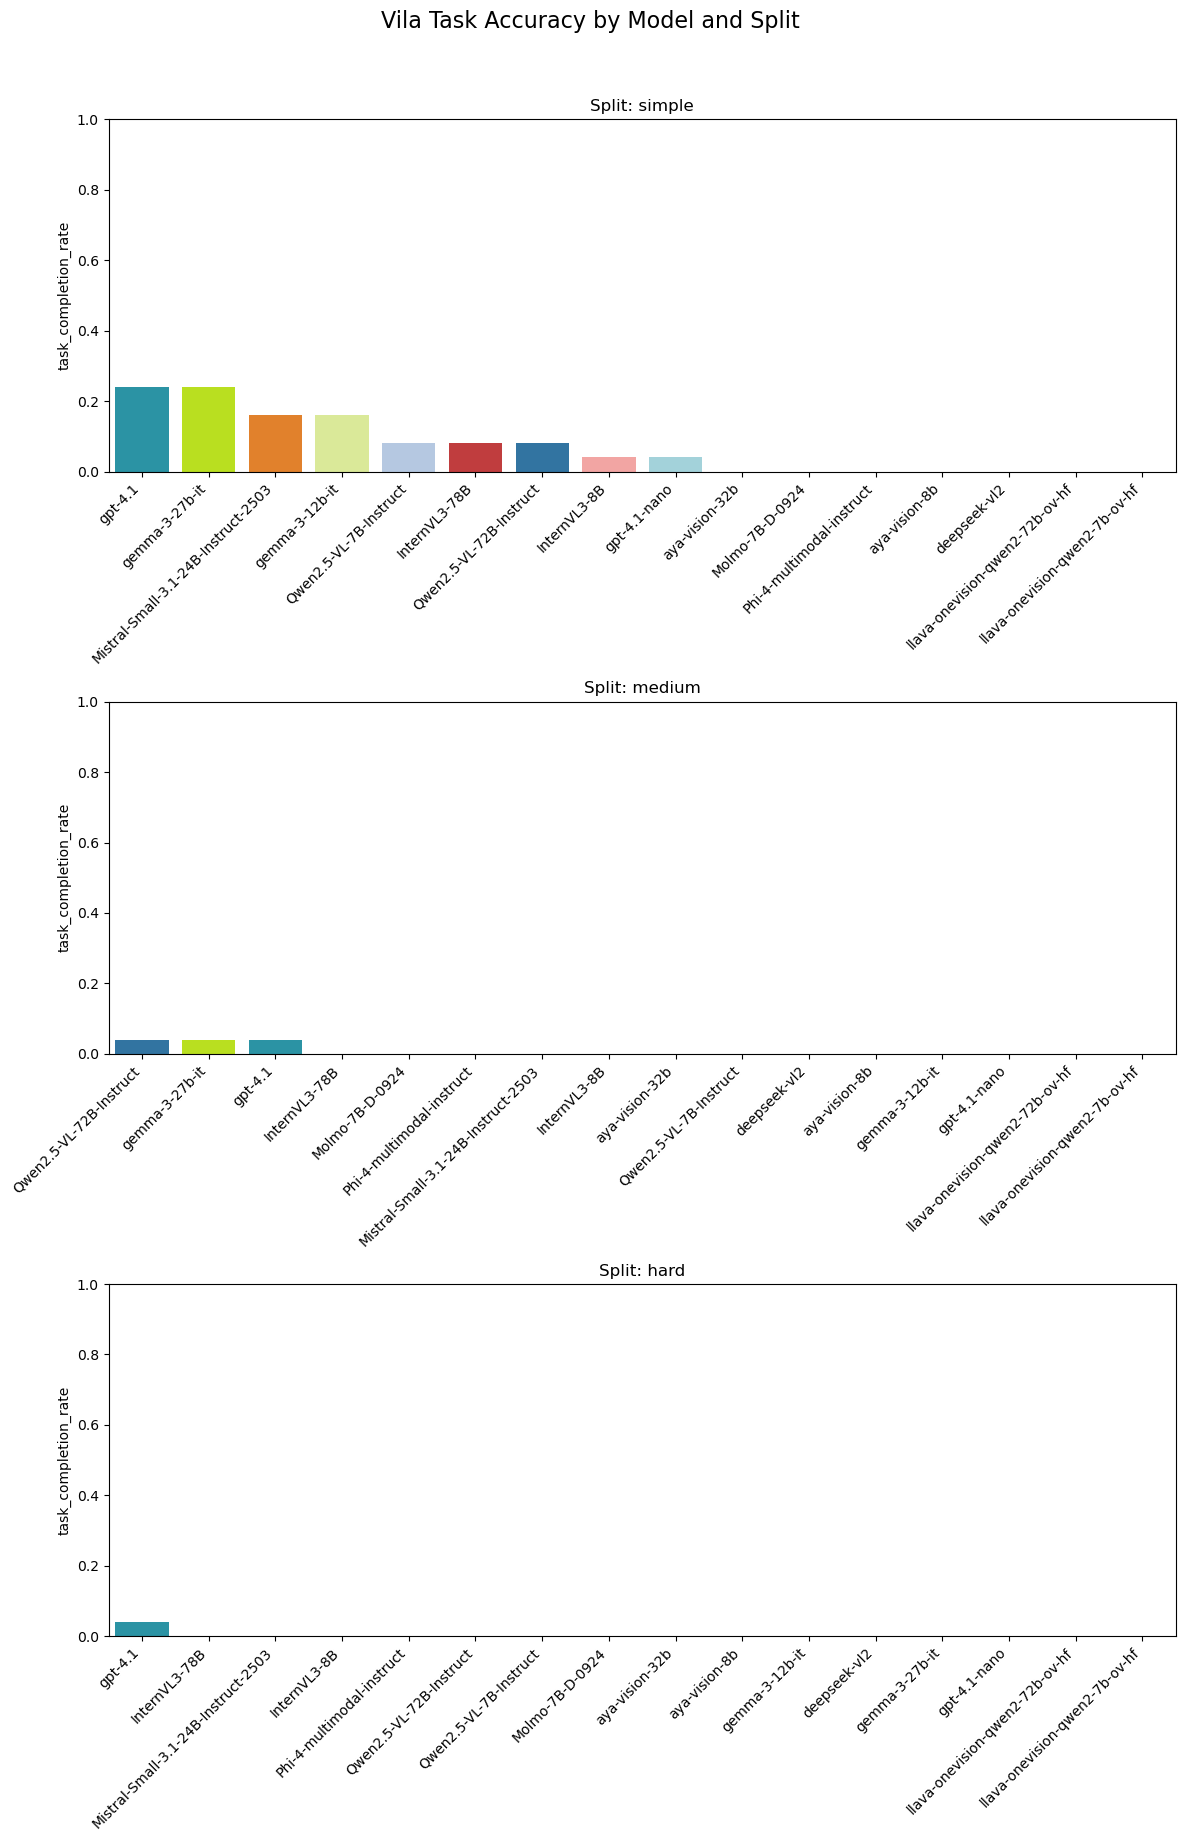

In [ ]:
def plot_vila_task_accuracy_bar(main_table):
    fig, axes = plt.subplots(len(splits), 1, figsize=(12, 18), sharey=True)
    for ax, split in zip(axes, splits):
        df_split = main_table[main_table['split'] == split]
        if df_split.empty:
            ax.set_visible(False)
            continue
        df_sorted = df_split.sort_values('task_completion_rate', ascending=False)
        sns.barplot(
            data=df_sorted,
            x='model', y='task_completion_rate',
            palette=color_map,
            ax=ax
        )
        ax.set_title(f"Split: {split}")
        ax.set_ylim(0, 1)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
        ax.set_xlabel('')
    fig.suptitle("Vila Task Accuracy by Model and Split", y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

plot_vila_task_accuracy_bar(vila_main_table)

/tmp/ipykernel_149072/4135128235.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_149072/4135128235.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_149072/4135128235.py:35: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


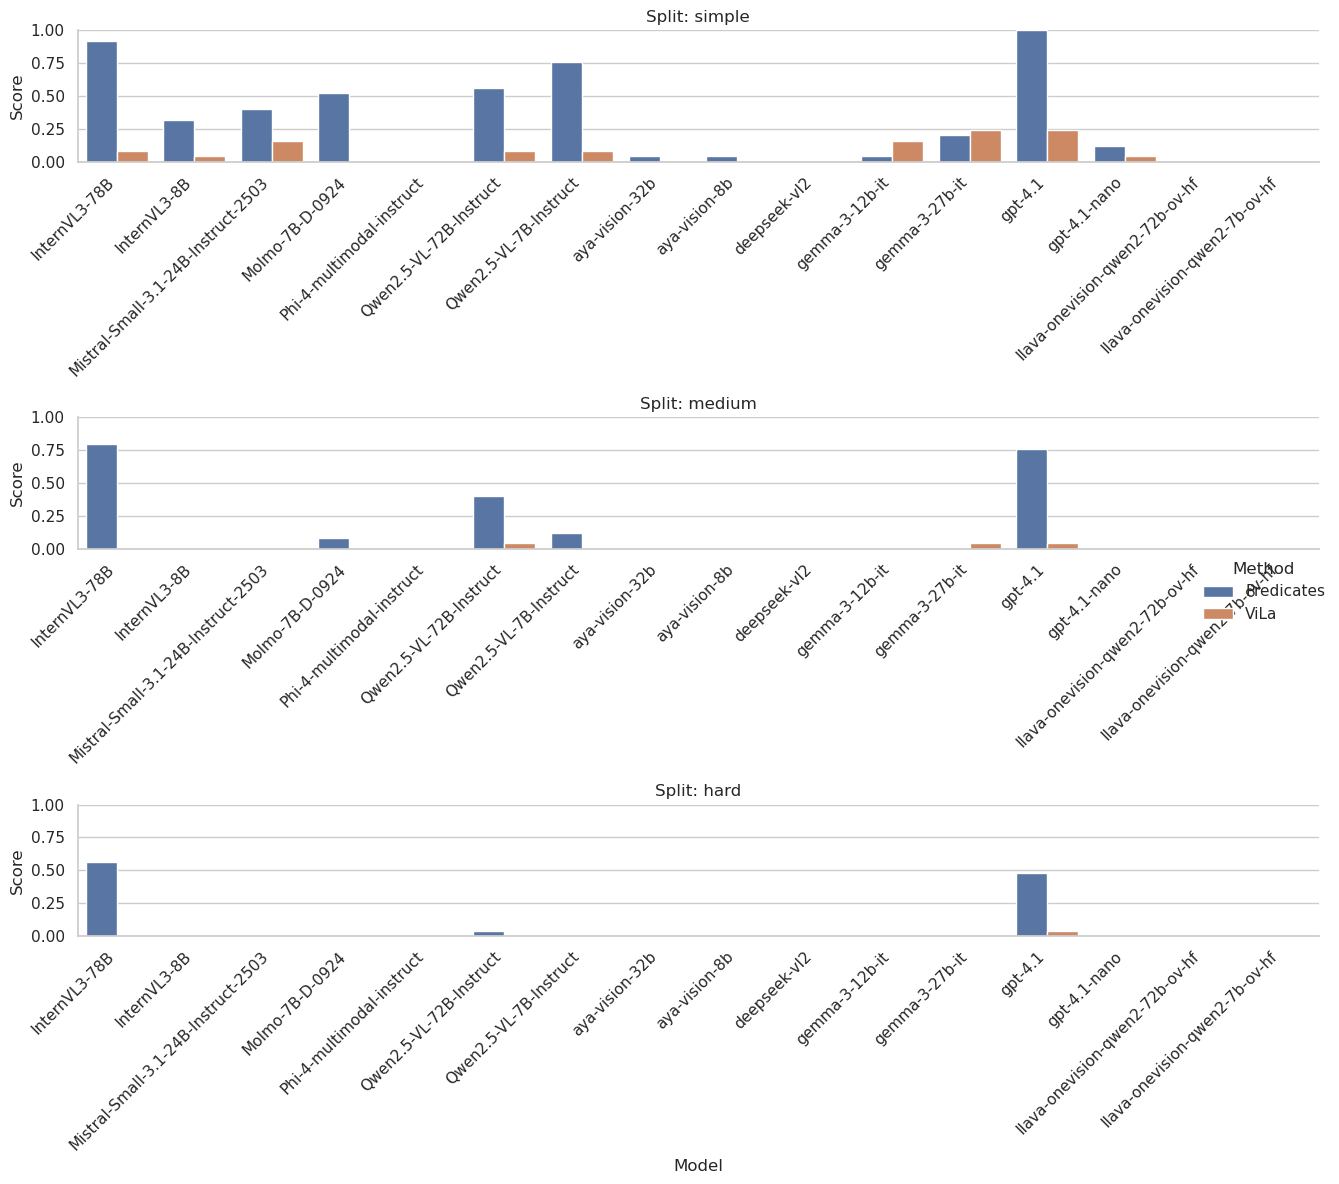

In [ ]:
# Compare task accuracy between Predicates and ViLa
df_compare = pd.merge(
    predicates_main_table[['model', 'split', 'task accuracy']],
    vila_main_table[['model', 'split', 'task_completion_rate']],
    on=['model', 'split']
).rename(columns={
    'task accuracy': 'Predicates',
    'task_completion_rate': 'ViLa'
})

df_long = df_compare.melt(
    id_vars=['model', 'split'],
    value_vars=['Predicates', 'ViLa'],
    var_name='Method',
    value_name='Score'
)

sns.set(style="whitegrid")
g = sns.catplot(
    data=df_long,
    x='model', y='Score',
    hue='Method', row='split',
    kind='bar',
    height=4, aspect=3,
    sharey=True,  # keep y shared
    sharex=False  # disable shared x so every facet draws its own ticks
)
g.set_titles("Split: {row_name}")
g.set_axis_labels("Model", "Score")
g.set(ylim=(0, 1))

# ensure every subplot shows its x‐ticks
for ax in g.axes.flat:
    ax.tick_params(axis='x', labelbottom=True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Random policy baseline for vila

In [ ]:
from viplan.code_helpers import get_logger
from viplan.planning.blocksworld_simulator import BlocksworldSimulator
from unified_planning.io import PDDLReader

import random

In [ ]:
from tqdm import tqdm

def get_env(domain, problem):
    reader = PDDLReader()
    problem = reader.parse_problem(domain, problem)
    logger = get_logger(log_level='error')
    env = BlocksworldSimulator(problem, root_path=ROOT, logger=logger, seed=1, use_gpu_rendering=False)
    return env

def random_policy(domain, problem, max_steps=50, seed=None):
    """
    A random policy that takes random actions until the problem is solved or max_steps is reached.
    """
    env = get_env(domain, problem)
    
    fail_counter = 0
    steps = 0
    
    random.seed(seed)
    
    while not env.goal_reached and steps < max_steps:
        steps += 1
        blocks = env.all_objects['block']
        columns = env.all_objects['column']

        b = str(random.choice(blocks))
        c = str(random.choice(columns))
        action = env._get_specific_action(b, c)
        success, info = env.apply_action(action)
        
        if not success:
            fail_counter += 1

    if env.goal_reached:
        return True, steps, fail_counter
    return False, steps, fail_counter

def get_random_baseline(domain, split, runs_per_problem=100, max_steps=50, seed=None):
    """
    Get the random baseline for a given domain and split.
    """
    problems_folder = os.path.join(ROOT, 'data', 'planning', 'blocksworld', 'problems', split)
    problems = [f for f in os.listdir(problems_folder) if f.endswith('.pddl')]
    
    results = {}
    for problem in tqdm(problems, desc=f"Random baseline problems ({split})", unit="problem"):
        results[problem] = []
        problem_path = os.path.join(problems_folder, problem)
        for _ in tqdm(range(runs_per_problem), desc=f"Runs for {problem}", unit="run", leave=False):
            success, steps, fail_counter = random_policy(
                domain, problem_path, max_steps=max_steps, seed=seed
            )
            results[problem].append({
                'success': success,
                'steps': steps,
                'fail_counter': fail_counter
            })
            
    # Compute statistics per problem
    stats_per_problem = {}
    all_success, all_steps, all_fail = [], [], []
    for problem, runs in results.items():
        successes = [r['success'] for r in runs]
        steps = [r['steps'] for r in runs]
        fails = [r['fail_counter'] for r in runs]
        stats_per_problem[problem] = {
            'success_rate': np.mean(successes),
            'steps_mean': np.mean(steps),
            'steps_std': np.std(steps),
            'fail_counter_mean': np.mean(fails),
            'fail_counter_std': np.std(fails),
        }
        all_success.extend(successes)
        all_steps.extend(steps)
        all_fail.extend(fails)

    # Overall statistics
    overall_stats = {
        'success_rate': np.mean(all_success),
        'steps_mean': np.mean(all_steps),
        'steps_std': np.std(all_steps),
        'fail_counter_mean': np.mean(all_fail),
        'fail_counter_std': np.std(all_fail),
    }

    return stats_per_problem, overall_stats

In [ ]:
domain_file = os.path.join(ROOT, 'data', 'planning', 'blocksworld', 'domain.pddl')

random_baselines = {}
for split in splits:
    max_steps = 10 if split == 'simple' else 20 if split == 'medium' else 30
    stats_per_problem, overall_stats = get_random_baseline(domain_file, split, runs_per_problem=100, max_steps=max_steps, seed=1)
    print(f"Split: {split}")
    print("Overall statistics:")
    print(overall_stats)
    print()
    random_baselines[split] = (overall_stats, stats_per_problem)

## ViLa w/CoT

In [ ]:
vila_folder_cot = os.path.join(experiment_folder_cot, 'vila')
vila_results_cot = load_results(vila_folder_cot)

Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/vila/simple/InternVL3-8B
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/vila/simple/gpt-4.1
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/vila/simple/InternVL3-78B
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/vila/simple/gemma-3-12b-it
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/vila/simple/gemma-3-27b-it
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/vila/simple/llava-onevision-qwen2-7b-ov-hf
Loading /scratch/cs/world-models/merlerm1/open-world-symbolic-planner/results/planning/blocksworld/run_27_04_25_cot/vila/simple/Qwen2.5-

In [ ]:
vila_models_cot = list_models(vila_results_cot)

Missing models in simple: {'Molmo-7B-D-0924'}
Missing models in medium: {'Molmo-7B-D-0924'}
Missing models in hard: {'Molmo-7B-D-0924'}


In [ ]:
vila_main_table_cot = construct_vila_table(vila_results_cot)
vila_main_table_cot

/scratch/work/bonettg1/.conda_envs/predicate_detection/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:3860: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/scratch/work/bonettg1/.conda_envs/predicate_detection/lib/python3.13/site-packages/numpy/_core/_methods.py:145: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


model   split  avg_plan_length  \
2                         InternVL3-78B  simple             3.80   
17                        InternVL3-78B  medium             0.32   
32                        InternVL3-78B    hard             1.48   
0                          InternVL3-8B  simple             9.48   
15                         InternVL3-8B  medium            19.56   
30                         InternVL3-8B    hard            28.12   
13  Mistral-Small-3.1-24B-Instruct-2503  simple             0.20   
28  Mistral-Small-3.1-24B-Instruct-2503  medium             0.08   
43  Mistral-Small-3.1-24B-Instruct-2503    hard             0.00   
9             Phi-4-multimodal-instruct  simple             6.60   
24            Phi-4-multimodal-instruct  medium             4.28   
39            Phi-4-multimodal-instruct    hard             4.40   
6               Qwen2.5-VL-72B-Instruct  simple             9.00   
21              Qwen2.5-VL-72B-Instruct  medium            17.60   
36              Qwen2.5-VL-72B-Instruct    hard            28.96   
10               Qwen2.5-VL-7B-Instruct  simple             8.92   
25               Qwen2.5-VL-7B-Instruct  medium            16.68   
40               Qwen2.5-VL-7B-Instruct    hard            19.60   
8                        aya-vision-32b  simple             3.36   
23                       aya-vision-32b  medium             5.44   
38                       aya-vision-32b    hard             2.36   
12                        aya-vision-8b  simple             8.32   
27                        aya-vision-8b  medium            15.44   
42                        aya-vision-8b    hard            12.84   
11                         deepseek-vl2  simple             9.68   
26                         deepseek-vl2  medium             6.68   
41                         deepseek-vl2    hard             6.00   
3                        gemma-3-12b-it  simple             6.92   
18                       gemma-3-12b-it  medium            13.44   
33                       gemma-3-12b-it    hard            22.64   
4                        gemma-3-27b-it  simple             7.72   
19                       gemma-3-27b-it  medium            15.40   
34                       gemma-3-27b-it    hard            24.64   
1                               gpt-4.1  simple             4.96   
16                              gpt-4.1  medium            14.72   
31                              gpt-4.1    hard            21.28   
7                          gpt-4.1-nano  simple             8.52   
22                         gpt-4.1-nano  medium            17.88   
37                         gpt-4.1-nano    hard            27.68   
14      llava-onevision-qwen2-72b-ov-hf  simple             0.00   
29      llava-onevision-qwen2-72b-ov-hf  medium             0.00   
44      llava-onevision-qwen2-72b-ov-hf    hard             0.00   
5        llava-onevision-qwen2-7b-ov-hf  simple             0.00   
20       llava-onevision-qwen2-7b-ov-hf  medium             0.00   
35       llava-onevision-qwen2-7b-ov-hf    hard             0.00   

    avg_success_plan_length  total_actions  total_success  total_failed  \
2                  3.000000             95             55            40   
17                      NaN              8              2             6   
32                      NaN             37             22            15   
0                  7.000000            237             68           169   
15                      NaN            489             62           427   
30                      NaN            703             52           651   
13                      NaN              5              3             2   
28                      NaN              2              0             2   
43                      NaN              0              0             0   
9                       NaN            165             40           125   
24                      NaN            107             20            87   
39   

/tmp/ipykernel_149072/1223389129.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/1223389129.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_149072/1223389129.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/1223389129.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
/tmp/ipykernel_149072/1223389129.py:9: FutureWarning: 

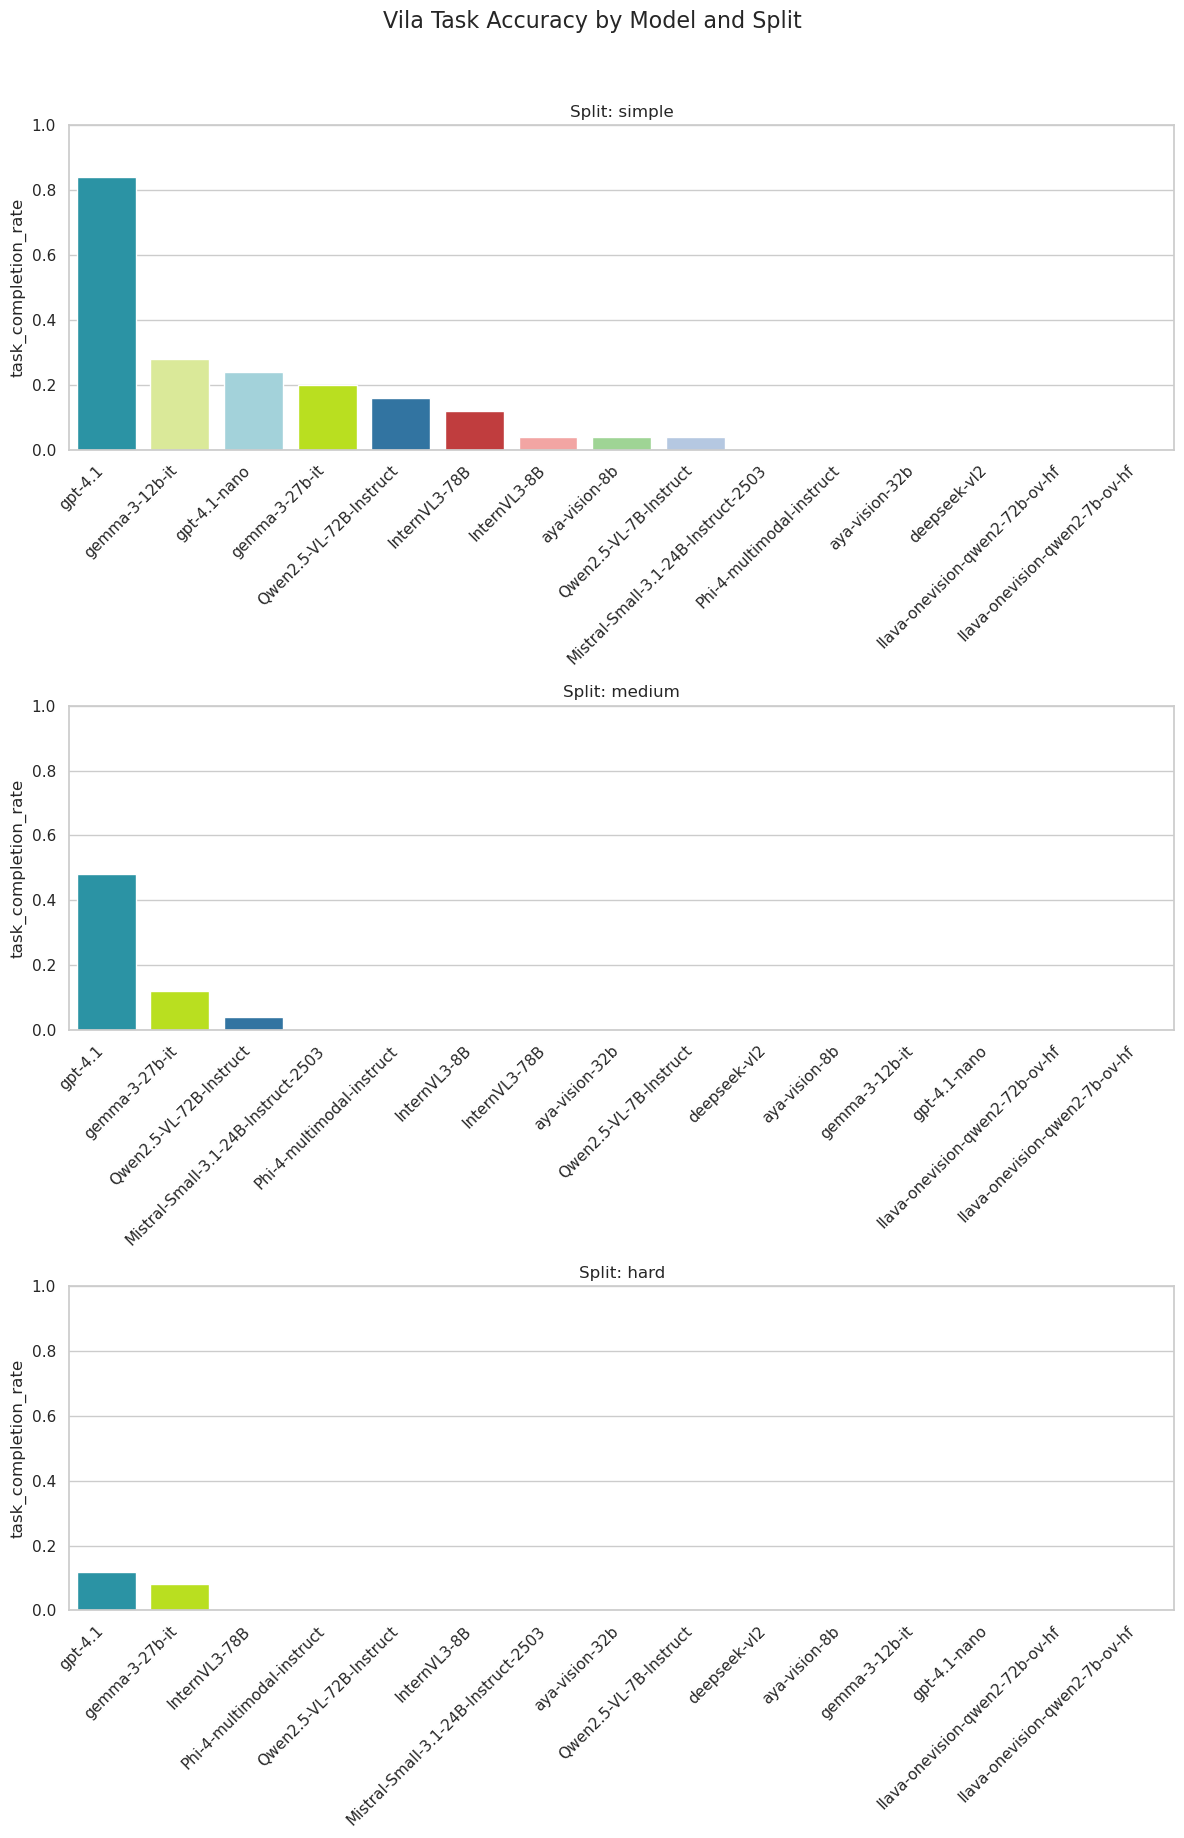

In [ ]:
plot_vila_task_accuracy_bar(vila_main_table_cot)

/tmp/ipykernel_149072/3211321746.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3211321746.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3211321746.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3211321746.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


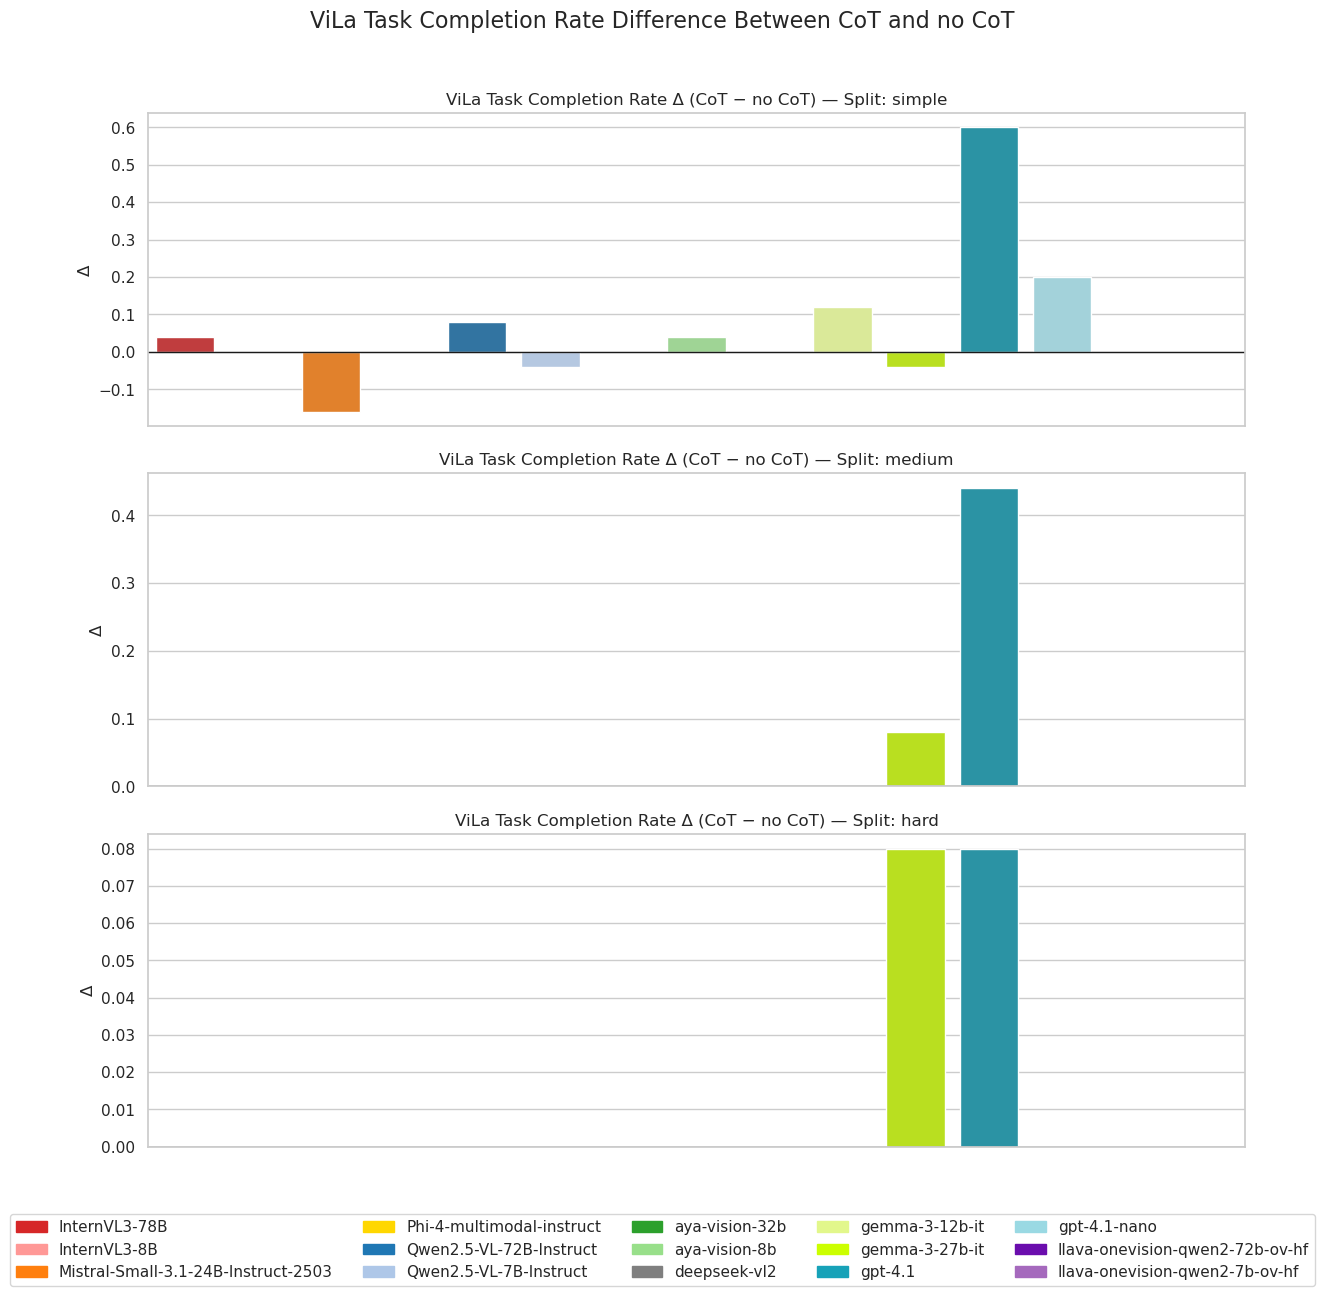

In [ ]:
# Compute the difference in task completion rate between CoT and no CoT
df_vila_diff = pd.merge(
    vila_main_table[['model', 'split', 'task_completion_rate']],
    vila_main_table_cot[['model', 'split', 'task_completion_rate']],
    on=['model', 'split'],
    suffixes=('_no', '_cot')
)
df_vila_diff['task_completion_rate_diff'] = (
    df_vila_diff['task_completion_rate_cot'] - df_vila_diff['task_completion_rate_no']
)

# Plot the difference for each split
fig, axes = plt.subplots(len(splits), 1, figsize=(12, 4 * len(splits)), sharex=True)
for ax, split in zip(axes, splits):
    sub = df_vila_diff[df_vila_diff['split'] == split]
    sns.barplot(
        data=sub,
        x='model', y='task_completion_rate_diff',
        palette=color_map,
        ax=ax
    )
    ax.axhline(0, color='k', linewidth=1)
    ax.set_title(f"ViLa Task Completion Rate Δ (CoT − no CoT) — Split: {split}")
    ax.set_ylabel("Δ")
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Add a legend
handles = [Patch(color=color_map[m], label=m) for m in sorted(df_vila_diff['model'].unique())]
fig.legend(
    handles=handles,
    labels=[h.get_label() for h in handles],
    loc='lower center',
    ncol=int(np.ceil(len(handles) / 3)),
    bbox_to_anchor=(0.5, -0.05)
)
fig.suptitle("ViLa Task Completion Rate Difference Between CoT and no CoT", y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 1])
plt.show()

## Predicates VS ViLa

/tmp/ipykernel_149072/3120906567.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3120906567.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3120906567.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/3120906567.py:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


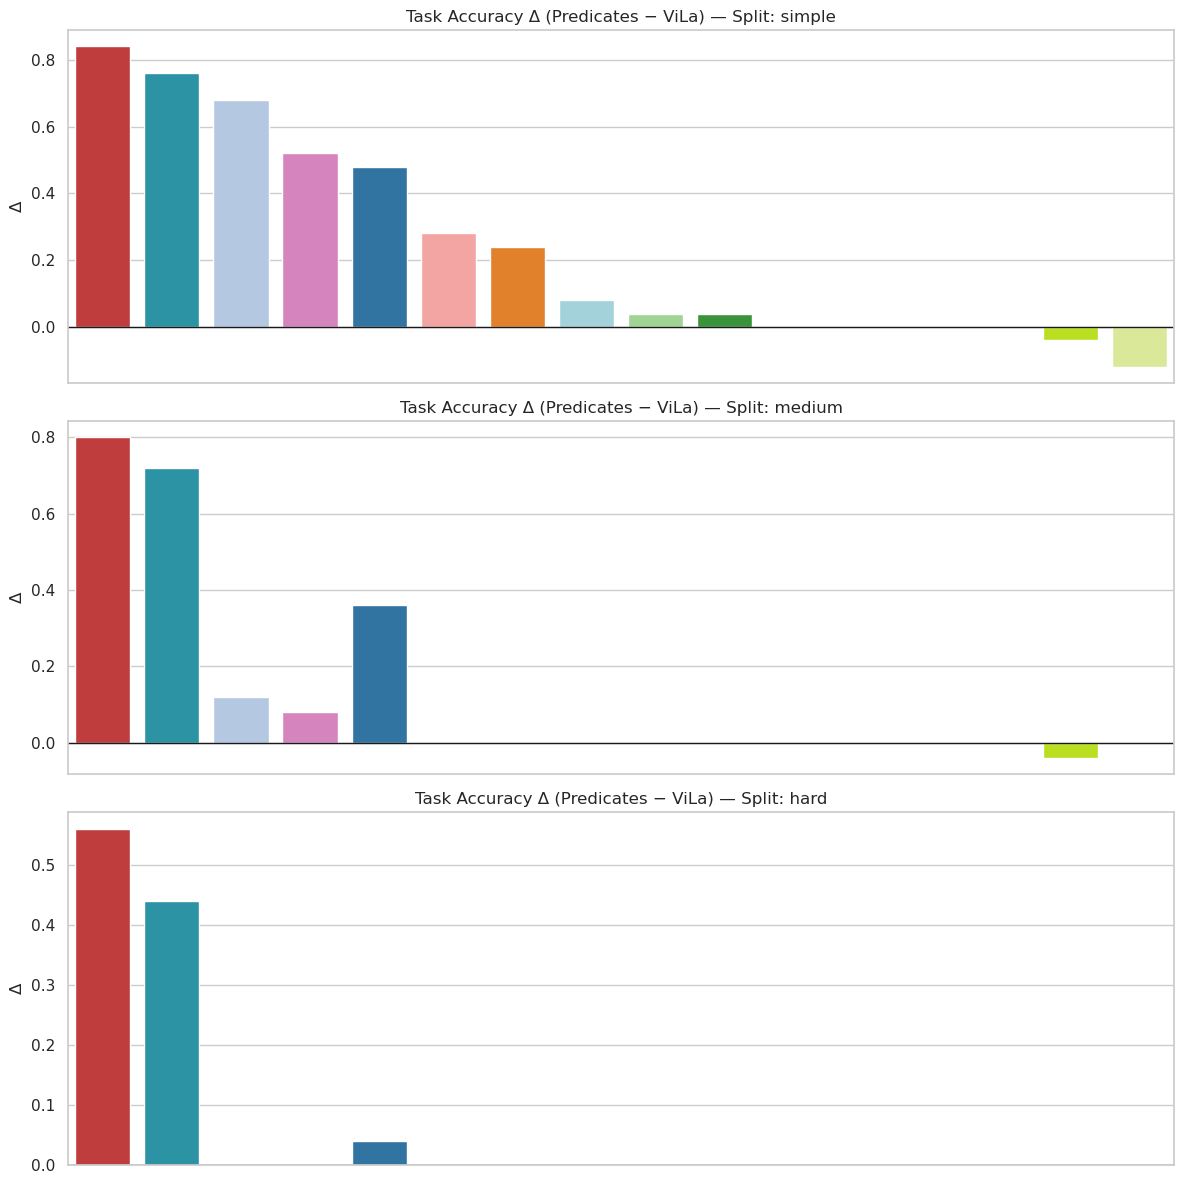

In [ ]:
# Compute the delta between Predicates task accuracy and ViLa task completion rate
df_pred_vila_diff = pd.merge(
    predicates_main_table[['model', 'split', 'task accuracy']],
    vila_main_table[['model', 'split', 'task_completion_rate']],
    on=['model', 'split']
).rename(columns={
    'task accuracy': 'Predicates',
    'task_completion_rate': 'ViLa'
})
df_pred_vila_diff['delta'] = df_pred_vila_diff['Predicates'] - df_pred_vila_diff['ViLa']

# Plot a 3×1 grid of barplots (one per split) showing Predicates−ViLa Δ
fig, axes = plt.subplots(len(splits), 1, figsize=(12, 4 * len(splits)), sharex=True)
for ax, split in zip(axes, splits):
    sub = df_pred_vila_diff[df_pred_vila_diff['split'] == split] \
              .sort_values('delta', ascending=False)
    sns.barplot(
        data=sub,
        x='model', y='delta',
        palette=color_map,
        ax=ax
    )
    ax.axhline(0, color='k', linewidth=1)
    ax.set_title(f"Task Accuracy Δ (Predicates − ViLa) — Split: {split}")
    ax.set_ylabel("Δ")
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

/tmp/ipykernel_149072/2873954437.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/2873954437.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/2873954437.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/tmp/ipykernel_149072/2873954437.py:29: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


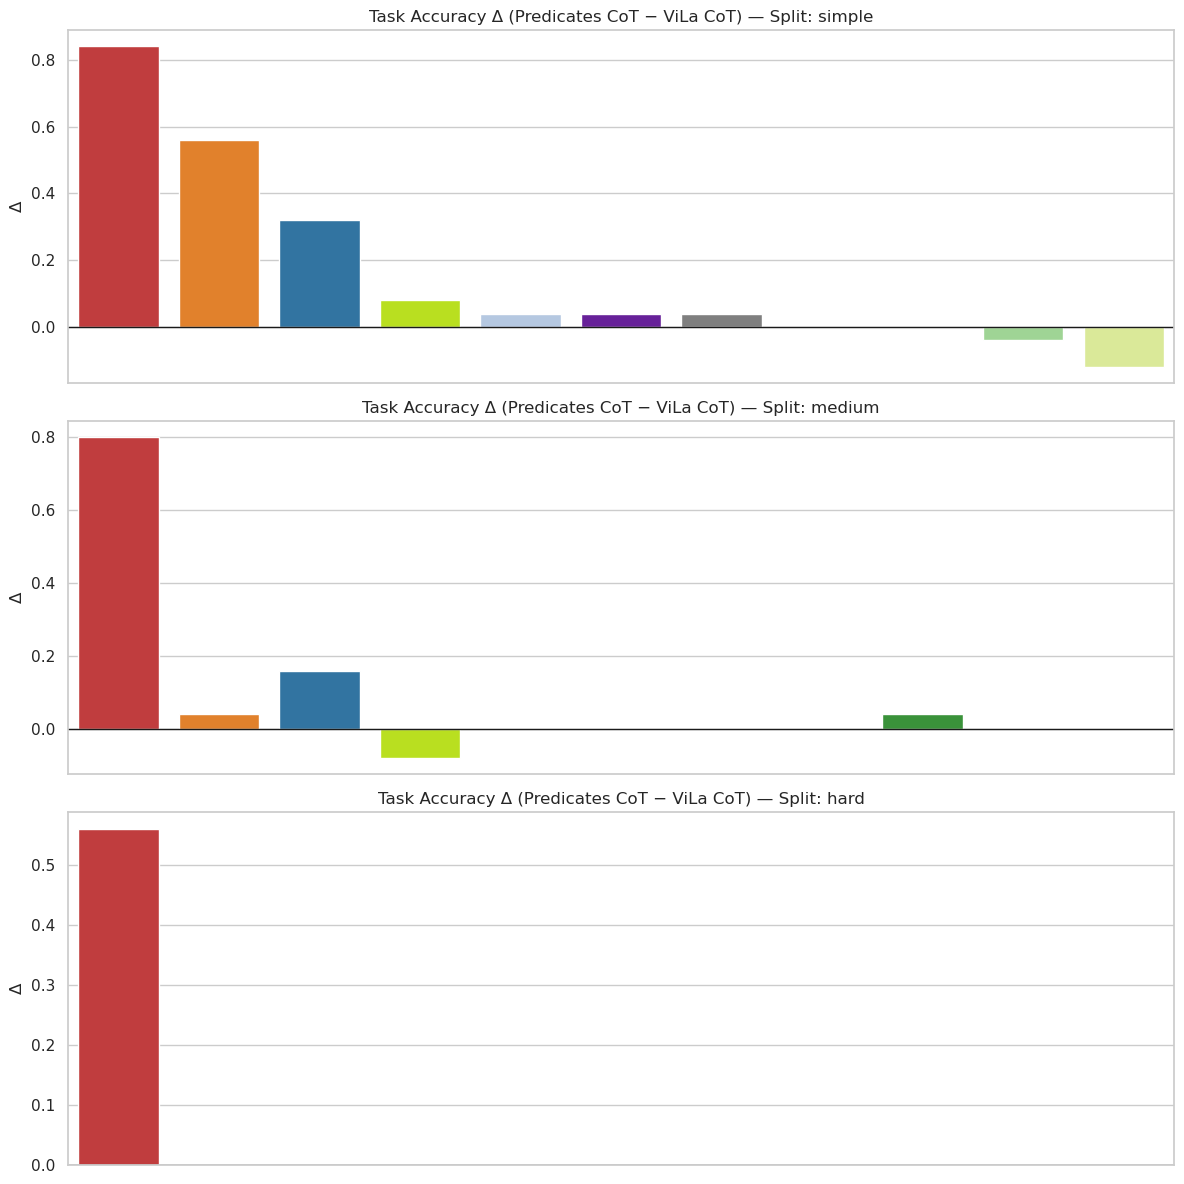

In [ ]:
# Compute the delta between Predicates CoT task accuracy and ViLa CoT task completion rate
df_pred_vila_cot_diff = pd.merge(
    main_table_predicates_cot[['model', 'split', 'task accuracy']],
    vila_main_table_cot[['model', 'split', 'task_completion_rate']],
    on=['model', 'split']
).rename(columns={
    'task accuracy': 'Predicates',
    'task_completion_rate': 'ViLa'
})
df_pred_vila_cot_diff['delta'] = df_pred_vila_cot_diff['Predicates'] - df_pred_vila_cot_diff['ViLa']

# Plot a 3×1 grid of barplots (one per split) showing Predicates CoT − ViLa CoT Δ
fig, axes = plt.subplots(len(splits), 1, figsize=(12, 4 * len(splits)), sharex=True)
for ax, split in zip(axes, splits):
    sub = (
        df_pred_vila_cot_diff[df_pred_vila_cot_diff['split'] == split]
        .sort_values('delta', ascending=False)
    )
    sns.barplot(
        data=sub,
        x='model', y='delta',
        palette=color_map,
        ax=ax
    )
    ax.axhline(0, color='k', linewidth=1)
    ax.set_title(f"Task Accuracy Δ (Predicates CoT − ViLa CoT) — Split: {split}")
    ax.set_ylabel("Δ")
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()